# SkimLit

### Bazı notlar
- Bir makalenin hangi konularda olduğunu merak ediyorsan bu sınıflandırma sorunu (etiket).
- PubMed, sağlıkla ilgili bir çok makalenin yer aldığı bir websitesidir.
- PubMed 200k RCT makalesi üzerinde çalışacağız.
- Bir tavsiye;
  - download a paper
  - implement it
  - keep doing this until you have slills
  - build insfractures around your models/data preprocessing steps
- Bu model many to one sorunu. Örnek bir paragrafta on cümle varsa hepsi ayrı ayrı değerlendirilir, bu input, ama hedef paragrafın etiketi ise tek kelime, bu da output. Yani kolaylaştırmak için her bir diziye hangi bölüme ait olmaları gerektiğine dair etiket veririz.

# Modelleme Adımları
1. Get data ready (turn into tensors)
2. Tensorflow hub, build or pick a pretrained model (to suit your problem)
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. ımprove through experimentation
6. Save and reload your trained model

* Tüm veri rakamlara dönüştürülmeli. Nöral ağlar metin veya doğal dil işleyemez.
* Tüm tensörler doğru ölçüde (shape) olmalı. Pad uzunluğu uymaz.

Önceki defterde (TensorFlow'daki NLP temelleri), bazı temel doğal lanuage işleme kavramlarından geçtik. Başlıcaları belirteç (kelimeleri sayılara dönüştürmek) ve gömme oluşturmak (kelimelerin sayısal bir temsilini oluşturmak).

Bu projede öğrendiklerimizi uygulamaya koyacağız.

Daha spesifik olarak, 2017 tarihli PubMed 200k RCT makalesinin arkasındaki derin öğrenme modelini çoğaltacağız: Tıbbi Özetlerde Sıralı Cümle Sınıflandırması için Bir Veri Kümesi. https://arxiv.org/abs/1710.06071

Yayınlandığında, makale ~200.000 etiketli Randomize Kontrollü Deneme (RCT) özetinden oluşan PubMed 200k RCT adlı yeni bir veri kümesi sundu.

Veri kümesinin amacı, NLP modellerinin sıralı olarak görünen cümleleri sınıflandırma yeteneğini araştırmaktı.

Başka bir deyişle, bir RCT'nin özeti göz önüne alındığında, her cümle soyutta nasıl bir role hizmet eder?

Aşağıdaki örnekte olduğu gibi öyle bir model inşa edilmeli ki bir makalenin ne olduğu, sonucu, neyi özetlediğini alabilmeliyiz.

Her cümleyi bir sıra olarak alırsın bir etiket verirsin. Örneğin ilk üç cümle alt alta gelmeli. Yani bir sequence sorunu var. Her cümlede bir etiket var ve many to one...

# Okuması zor:

Nutritional psychiatry: the present state of the
evidence

Wolfgang Marx 1, Genevieve Moseley 2, Michael Berk 2, Felice Jacka 2

Affiliations + expand
PMID: 28942748 DOI: 10.1017/S0029665117002026
Abstract Mental illness, including depression, anxiety and bipolar disorder, accounts for a significant
proportion of global disability and poses a substantial social, economic and heath burden. Treatment is presently dominated by pharmacotherapy, such as antidepressants, and psychotherapy, such as cognitive behavioural therapy; however, such treatments avert less than half of the disease burden, suggesting that additional strategies are needed to prevent and treat mental disorders. There are now consistent mechanistic, observational and interventional data to suggest diet quality may be a modifiable risk factor for mental illness. This review provides an overview of the nutritional psychiatry field. It includes a discussion of the neurobiological mechanisms likely modulated by diet, the use of dietary and nutraceutical interventions in mental disorders, and recommendations for further research. Potential biological pathways related to mental disorders include inflammation, oxidative stress, the gut microbiome, epigenetic modifications and neuroplasticity. Consistent epidemiological evidence, particularly for depression, suggests an association between measures of diet quality and mental health, across multiple populations and age groups; these do not appear to be explained by other demographic, lifestyle factors or reverse causality. Our recently published intervention trial provides preliminary clinical evidence that dietary interventions in clinically diagnosed populations are feasible and can provide significant clinical benefit. Furthermore, nutraceuticals including n-3 fatty acids, folate, S- adenosylmethionine, N-acetyl cysteine and probiotics, among others, are promising avenues for future research. Continued research is now required to investigate the efficacy of intervention studies in large cohorts and within clinically relevant populations, particularly in patients with
schizophrenia, bipolar and anxiety disorders.
Source: https://pubmed.ncbi.n/m.nih.gov/28942748/

# Okuması kolay:

Considerations for a surgical RCT for diffuse low-
grade glioma: a survey

Alireza Mansouri 1, Karanbir Brar 2, Michael D Cusimano 3
Affiliations + expand

PMID: 32537182 PMCID: PMC7274180 (available on 2021-06-01) DOI: 10.1093/nop/npz058

Abstract
Background: Diffuse low-grade gliomas (DLGGs) are heterogeneous tumors that inevitably
-maximal safe resection of DLGGs has been favored. However, this transition is not supported by
-ai realise it main an intes leadin a disa. Hi enver, ai. ansi, is sort upor up front :
randomized controlled trial (RCT) data. Here, we sought to survey the neuro-oncology community

Methods: A 21-question survey focusing on a surgical RCT for DLGGs was developed and validated by 2 neurosurgeons. A sample case of a patient for whom management might be debatable was presented to gather additional insight. The survey was disseminated to members of the Society for Neuro-Oncology (SNO) and responses were collected from March 16 to July 10,2018.

Results: A total of 131 responses were collected. Sixty-three of 117 (54%) respondents thought an RCT would not be ethical, 39 of 117 (33%) would consider participating, and 56 of 117 (48%) believed an RCT would be valuable for determining the differing roles of biopsy, surgery, and observation. This was exemplified by an evenly distributed selection of the latter management options for our sample case. Eighty-three of 120 (69.2%) respondents did not believe in equipoise for DLGG patients. Quality of life and overall survival were deemed equally important end points for
a putative RCT.

Conclusions: Based on our survey, it is evident that management of certain DLGG patients is not well defined and an RCT may be justified. As with any surgical RCT, logistic challenges are anticipated. Robust patient-relevant end points and standardization of perioperative adjuncts are
necessary if a surgical RCT is undertaken.
Source: https://pubmed.ncbi.nlm.nih.gov/32537182/

Aşağıdakidaki input, skimlit modelinden geçerek bazı etiketler alır;

- background
- objective
- methods
- result
- conclusion

Örnek tahmin edilmiş output olarak [0.03, 0.82, 0.13, 0.02, 0.001] olabilir.

Burada çok sınıflı sınıflandırma var.

input örneği olarak shape = [batch_size, embedding_size]

[None, 512] ya da [32, 512] gibi.

Output shape [5] (Yukarıdaki beş etikete dikkat. Aslında modelde makalede senin hangi parametreleri verdiğinle ilgili bir konu).

Giriş ve çıktı şekli üzerinde çalıştığımız problemdeki gömme stiline bağlıdır.


# Model Girişi

Örneğin, aşağıdaki girdiyi alan bir NLP modelini eğitebilir miyiz (not: aşağıdaki örnekte tüm sayısal semboller "@" ile değiştirilmiştir):

To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ). Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD )., Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured. There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

# Model çıkışı

Ve aşağıdaki çıktıyı döndürür:

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']

# Bir cümledeki sorun

Yayınlanan RCT makalelerinin sayısı artmaya devam ediyor, yapılandırılmış özetleri olmayanları okumak zor olabilir ve buna karşılık literatürde ilerleyen araştırmacıları yavaşlatabilir.

# Bir cümledeki çözüm

Araştırmacıların literatürü gözden geçirmelerini (dolayısıyla SkimLit 🤓🔥) gözden geçirmelerini ve gerektiğinde daha derine dalmalarını sağlamak için soyut cümleleri oynadıkları role (örneğin amaç, yöntemler, sonuçlar, vb.) sınıflandırmak için bir NLP modeli oluşturun.

1. Verilerimizin nereden geldiği: PubMed 200k RCT: Tıbbi Özetlerde Sıralı Cümle Sınıflandırması için bir Veri Kümesi https://arxiv.org/abs/1710.06071

2. Modelimiz nereden geliyor: Tıbbi kağıt özetlerinde ortak cümle sınıflandırması için sinir ağları. https://arxiv.org/pdf/1612.05251

📖 Kaynaklar: Bu not defterindeki kodu gözden geçirmeden önce, ne yapacağımıza dair bir arka plan almak isteyebilirsiniz. Bunu yapmak için, aşağıdaki kağıtları gözden geçirmek için bir (veya iki saat) harcayın ve ardından bu deftere dönün:

# Çalışma Kitabı İçeriği

NLP temelleri not defterinde öğrendiklerimizi alma ve şimdiye kadarki en büyük NLP modelimizi oluşturma zamanı:

* Bir metin veri kümesi indirme (GitHub'dan PubMed RCT200k) https://github.com/Franck-Dernoncourt/pubmed-rct

* Verilerimizi modellemeye hazırlamak için bir ön işleme işlevi yazmak

  * Bir dizi modelleme deneyi kurmak

  * Temel çizgi yapma (TF-IDF sınıflandırıcı)

* Farklı kombinasyonlara sahip derin modeller: belirteç gömmeleri, karakter gömmeleri, önceden eğitilmiş gömmeler, konumsal gömmeler

  * İlk multimodal modelimizi oluşturmak (birden fazla veri girişi türü alarak)

* Model mimarisini https://arxiv.org/abs/1612.05251 adresinden çoğaltma

* En yanlış tahminleri bulun

* Vahşi doğadan PubMed özetleri hakkında tahminler yapmak

# Kaynaklar

Dosyalar & Kaynaklar: https://github.com/mrdbourke/tensorflow-deep-learning

Bu dosyanın orjinali: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb

In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-05-26 09:43:43.808070


# Bir GPU'ya erişimi onayla

Derin öğrenme modelleri oluşturacağımıza göre, bir GPU'muz olduğundan emin olalım.

Google Colab'da bunu Çalışma Zamanı -> Çalışma zamanı türünü değiştir -> Donanım hızlandırıcı -> GPU'ya giderek ayarlayabilirsiniz.

Bir GPU'ya erişiminiz yoksa, burada oluşturduğumuz modellerin çalışması muhtemelen 10 kat daha uzun sürecektir.

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0ecb1390-ec25-8fb2-ddd5-38ac46cfe541)


# Veri al

Bir model oluşturmaya başlamadan önce PubMed 200k RCT veri kümesini indirmemiz gerekiyor.

Olağanüstü bir nezaket eylemi olarak, makalenin yazarları, araştırmaları için kullandıkları verileri GitHub'daki .txt dosyaları biçiminde herkese açık ve ücretsiz olarak yaptılar.

Bunları git clone https://github.com/Franck-Dernoncourt/pubmed-rct kullanarak yerel dizinimize kopyalayabiliriz.

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 23.27 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


İndirilen deponun içeriğini kontrol ederek dört klasör olduğunu görebilirsiniz.

Her biri PubMed 200k RCT veri kümesinin farklı bir sürümünü içerir.

GitHub sayfasındaki README dosyasına baktığımızda aşağıdaki bilgileri elde ediyoruz: https://github.com/Franck-Dernoncourt/pubmed-rct

- PubMed 20k, PubMed 200k'nin bir alt kümesidir. Yani, PubMed 20k'deki herhangi bir özet mevcut, PubMed 200k'de de mevcuttur.

- PubMed_200k_RCT, PubMed_200k_RCT_numbers_replaced_with_at_sign ile aynıdır, ancak ikincisinde tüm sayılar @ ile değiştirilmiştir. (PubMed_20k_RCT vs. PubMed_20k_RCT_numbers_replaced_with_at_sign).

- Github dosya boyutu sınırı 100 MiB olduğundan, PubMed_200k_RCT\train.7z ve PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip dosyalarını sıkıştırmak zorunda kaldık. Train.7z'yi açmak için Windows'ta 7-Zip, Mac OS X'te Keka veya Linux'ta p7zip kullanabilirsiniz.

Başlangıç olarak, odaklanacağımız veri kümesi PubMed_20k_RCT_numbers_replaced_with_at_sign'dır.

Neden bu?

Tüm 200 bin veri kümesiyle çalışmak yerine, daha küçük bir alt kümeyle başlayarak deneylerimizi hızlı tutacağız. @ ile değiştirmek yerine sayılarla veri kümesini seçebilirdik ama seçmedik.

Dosya içeriğini kontrol edelim.

In [ ]:
# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


Güzel, görünüşe göre üç ayrı metin dosyamız var:

* Train.txt - eğitim örnekleri.

* Dev.txt - dev, doğrulama kümesinin başka bir adı olan geliştirme kümesinin kısaltmasıdır (bizim durumumuzda, bu dosyayı doğrulama kümemiz olarak kullanacağız ve atıfta bulunacağız).

* Test.txt - test örnekleri.

Her seferinde hedef dizinimize dosya yolunu yazarak kendimizi kaydetmek için, onu bir değişkene dönüştürelim.

Örnek datasetini incelersen;

CONCLUSION ..cümle....

METHODS..cümle... şeklinde görürsün.

Dosya yolu sağ klik ile kopyalandı buraya yapıştırıldı.

In [ ]:
# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

# Ön işlem verileri

Tamam, şimdi bazı metin verileri indirdik, sence modellemeye hazır mıyız?

Verileri indirdik ama henüz bakmadık bile.

Herhangi bir yeni veri kümesine aşina olmanın sloganı nedir?

Sana bir ipucu vereceğim, kelime "v" ile başlıyor ve bunu üç kez söylüyoruz.

Vibe, vibe, vibe? (titreşim)

Bir nevi... kesinlikle verilerimizin havasını hissetmeliyiz.

Values, values, values?

Yine, çok fazla değer görmek istiyoruz ama tam olarak aradığımız şey değil.

Visualize, visualize, visualize?

Bu kadar. Derin öğrenme modellerimiz için verilerimizi nasıl hazırlamamız gerektiğini öğrenmek ve anlamak için onu görselleştirmeliyiz.

Verilerimiz metin dosyaları biçiminde olduğundan, bir hedef dosyadaki satırların her birini okumak için biraz kod yazalım.

# Python'da metin dosyalarını okuma

google'a yaz --> "python read text file"

realpython.com/read-write-files-pyhton

Bir metin dosyası adı ve metin satırlarını liste olarak döndürür,  dosya yolunu iletiriz ve ardından o metin dosyasındaki tüm satırları liste olarak döndürürüz.

r --> read; f--> file...dosyayı oku sonra file'ye dönüştür.

readlines -->  Dosya nesnesinden kalan satırları okur ve bunları bir liste olarak döndürür.

In [ ]:
# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.

  Args:
      filename: a string containing the target filepath to read.

  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

Pekala, küçük bir işlevimiz var, bir metin dosyasının dosya yolunu alan, açan, satırların her birini okuyan ve döndüren get_lines().

Eğitim verileri üzerinde deneyelim (train.txt).

In [ ]:
# read the lines with the training files
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # the whole first example of an abstract + a little more of the next one

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Başta ###4343 gibi sayısal kimlik biçimleri var. Bir soyutun başlangıcını ayırt etmek için faydalı olabilir.

Eğitim metin dosyasındaki satırları okumak, farklı soyut örnekler içeren dizelerin bir listesiyle sonuçlanır, bir örnekteki cümleler ve cümlenin özette oynadığı rol.

Her cümlenin rolü, bir sekme (\t) ile ayrılmış her satırın başında ön eklenir ve her cümle yeni bir satırla (\n) biter.

Farklı özetler soyut kimlikleri (### ile başlayan satırlar) ve yeni satırlar (\n) ile ayrılır.

Bunu bilerek, örneklerimizi gelecekteki makine öğrenimi modelimize eğitim verileri olarak aktarmaya hazır hale getirmek için yapmamız gereken birkaç adım var gibi görünüyor.

Aşağıdaki adımları gerçekleştirmek için bir işlev yazalım:

- Soyut örneklerden oluşan bir hedef dosya alın.

- Hedef dosyadaki satırları okuyun.

- Hedef dosyadaki her satır için:

  - Satır ### ile başlıyorsa, bunu soyut kimlik ve yeni bir özetin başlangıcı olarak işaretleyin.

    - Bir örnekteki satır sayısının sayısını koruyun.

  - Satır \n ile başlıyorsa, bunu soyut bir örneğin sonu olarak işaretleyin.

    - Bir örnekteki toplam satırların sayısını koruyun.

  - \t'den önceki metni satırın etiketi olarak kaydedin.

  - \t'den sonraki metni satırın metni olarak kaydedin.

- Hedef metin dosyasındaki tüm satırları anahtar/değer çiftlerini içeren sözlüklerin bir listesi olarak döndürün:

  - "Line_number" - özetteki satırın konumu (örn. 3).

  - "Hedef" - çizginin soyuttaki rolü (örn. AMAÇ).

  - "Metin" - soyuttaki satırın metni.

  - "Total_lines" - soyut bir örnekteki toplam satır (örn. 14).

- Özet kimlikleri ve yeni satırlar, döndürülen önceden işlenmiş verilerden atlanmalıdır.

Örnek, önceden işlenmiş numune döndürdü (özetten tek bir satır):

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]

Etiketleri metinden ve her bir özetten ayıracak bir işlev yazmamız gerekiyor.
Birbirlerinden de ayrı tutmamız lazım onları.

len(train_lines) --> 210040

Sözlük yazmalısın;

[{ 'line_number' : 0,

  'target' : 'BACKGROUND',

  'text' : '......\n'

  'total_lines' : 11     
}]


# Not:
Sample data'daki dört giriş dosyasını da kaynak dosyaları da incele! Bu dosyalar nasıl oluşturulabilir?

# Aşağıdaki fonksiyon notları:

- Sözlüklerin bir listesi döndürülür.
- Bu fonks. ile dosya alınır, içeriği okunur, her bir satıra verilir. Hedef etiket, cümle metni, bir paragraftaki cümle sayısı ve hedefteki cümle numarası çıkarılır.
- input_lines --> Değişkendir. Hedef dosya adına tüm satırları liste formatında alır.
- abstract_lines --> soyut satırlar, farklı özetleri ayırmamızı sağlayan string yöntemii...### /n bu bir paragraf ayırır.
- txt = "Merhaba, dünya"; x = txt.startswith("Merhaba"); print(x) --> True
- abstract_lines --> Eğer satır, satır içindeyse, çünkü bu soyut satırı değişkenin yukarısındaysa hepsini kaydederiz. Yani hepsi düzgün çalıştığında soyut satırları kaydeder. Ancak ### olanlara gelirsek başlangıçta buna sahip olan soyut satır değişken için bunu sağlayacak yer açılır.
- txt = " "; x = txt.isspace(); print(x) = True
- Bu yeni bir satır olup olmadığını kontrol eder, ters eğik çizgili n yeni satır, boş dize.
- split_line --> Özet üzerinden geçtikten sonra aslında hepsi tek bir dizeye kaydedilir ve bu değişken bunların her birini kendi dizelerine böler. Bunların her birinde ters eğik çizgili n var ve gördüğünde her satırı ayrı ayrı böler.
- İkinci döngüde Metni böl ve geçir sekmesini çağırdığında bu kendi dizesine böler. Hedef ve metni kendi dizesine dönüştürür.
- Pythın 0 ile başlar, [0] sonra 1...total_lines -1...
- # ile başlamaz ve ters eğik çizgili n ile bitmezse fonksiyon tüm bu satırları söyler yani yeni bir satır.

dev: doğrulama veri kümesi

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

Bu iyi görünen bir işlev. RCT 20k veri kümelerimizin her birini önceden işlemek için kullanalım.

In [ ]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 764 ms, sys: 142 ms, total: 905 ms
Wall time: 1.51 s


(180040, 30212, 30135)

Eğitim örneklerimiz nasıl görünüyor?

In [ ]:
# Check the first abstract of our training data
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Muhteşem! Preprocess_text_with_line_numbers() işlevimiz harika çalıştı gibi görünüyor.

Sözlük listemizi panda DataFrame'e dönüştürmeye ne dersiniz, böylece onları daha iyi görselleştirebiliriz?

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


Artık verilerimiz DataFrame formunda, üzerinde bazı veri analizleri yapabiliriz.

In [ ]:
# Distribution of labels in training data
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

OBJECTIVE etiketli cümlelerin en az yaygın olduğu gibi görünüyor.

Özet uzunluklarımızın dağılımını kontrol etmeye ne dersiniz?

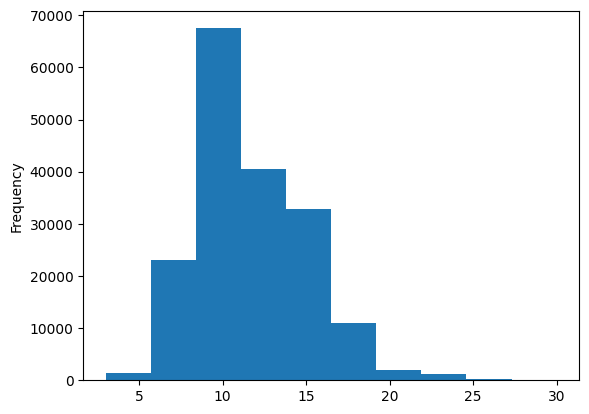

In [ ]:
train_df.total_lines.plot.hist();

Tamam, özetlerin çoğu yaklaşık 7 ila 15 cümle uzunluğunda gibi görünüyor.

Bir modeli eğittiğimizde veya görünmeyen örnekler üzerinde test ettiğimizde, sonuçlarımızın tuhafen olmadığından emin olmak için bunları kontrol etmek iyidir.

# Cümle listelerini al

Derin öğrenme modelimizi oluşturduğumuzda, ana girdilerinden biri dizelerin bir listesi (bir soyutun satırları) olacaktır.

"Metin" sütunlarımızda tolist() yöntemini çağırarak bunları DataFrame'lerimizden kolayca alabiliriz.

In [ ]:
# Convert abstract text lines into lists
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
# View first 10 lines of training sentences
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Pekala, metin örneklerimizi ayırdık. Tahmin edebileceğiniz gibi, makine öğrenimi modellerimizle kullanmadan önce metni sayılara dönüştürmek için kod yazmamız gerekecek, buna yakında ulaşacağız.

# Sayısal etiketler yapın (ML modelleri sayısal etiketler gerektirir)

Bir tane sıcak ve etiket kodlanmış etiketler oluşturacağız.

Sadece etiket kodlu etiketler yapmaktan kurtulabiliriz, ancak TensorFlow'un CategoricalCrossentropy kayıp işlevi, bir sıcak kodlanmış etikete sahip olmayı sever (bu, daha sonra etiket yumuşatmayı kullanmamızı sağlayacaktır).

Etiketleri sayısal olarak kodlamak için Scikit-Learn'in OneHotEncoder ve LabelEncoder sınıflarını kullanacağız.

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Sparse yeni versiyonda gelen bir özellik, varsayılan true'dir. False yaptığımızda hata vermedi, True olduğunda matris uzunluğu belirsiz uyarısı alındı.

Onehotencoder iki boyutludur, doğru şekilde veri olmazsa şeklini (-1,1) yap uyarısı alırsın. Bu yüzden kod satırına eklendi.

val_labels_one_hot  --> Doğrulama hedef etiketlerimizi aynı şekilde dönüştürmek için yalnızca dönüştürülmüş yöntemi kullanmamız gerekiyor. Yani bulunan eğitim veri çerçevesinden etiketlerin yapısını alınır ve doğrulama veri çerçevesini aynı şekilde kodlar.


In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Etiket kodlama etiketleri

LabelEncoder bir sınıftır.



In [ ]:
# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

Şimdi bir LabelEncoder örneğini eğittik, classes_ özniteliğini kullanarak sınıf adlarını ve sınıf sayısını alabiliriz.

In [ ]:
# Get class names and number of classes from LabelEncoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# Bir dizi model deneyi oluşturma

Verilerimizi işledik, bu yüzden şimdi, gerçek makine öğrenimi tarzında, bir dizi modelleme deneyi kurmanın zamanı geldi.

Tıbbi kağıt özetlerinde ortak cümle sınıflandırması için Sinir ağlarında özetlenen dizi modelini çoğaltmaya doğru ilerlerken, daha karmaşık modeller oluşturarak yenmeye çalışacağımız bir puan elde etmek için basit bir temel model oluşturarak başlayacağız. https://arxiv.org/pdf/1612.05251

Her model için, eğitim verileri üzerinde eğiteceğiz ve doğrulama verileri üzerinde değerlendireceğiz.

# Model 0: Temel alma

İlk modelimiz, Scikit-Learn'in makine öğrenimi haritası tarafından önerildiği gibi bir TF-IDF Multinomial Naive Bayes olacağız. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Bunu oluşturmak için, TF-IDF (terim frekansı-ters belge frekansı) algoritmasını kullanarak soyut cümlelerimizi sayılara dönüştürmek için TfidfVectorizer sınıfını kullanan bir Scikit-Learn Pipeline oluşturacağız ve ardından MultinomialNB agloritm'i kullanarak cümlelerimizi sınıflandırmayı öğreneceğiz.

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Metinleri eğitim cümlelerinde sayılara dönüştürmek için pipeline'yi ekledik.

Pipeline bir tuple türünde listedir.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences,
            y=train_labels_encoded);

Multinomial Naive Bayes algoritmasının hızı nedeniyle çok hızlı antrenman yapıyor.

Score() yöntemini kullanarak modelimizin doğrulama veri kümesi üzerindeki doğruluğunu değerlendirebiliriz.

In [ ]:
# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

Güzel! Görünüşe göre %72.1 doğruluk, daha derin modellerimizle yenilecek sayı olacak.

Şimdi daha fazla değerlendirmek için temel modelimizle bazı tahminlerde bulunalım.

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

Temel çizgimizin tahminlerini değerlendirmek için, önceki not defterinde oluşturduğumuz calculate_results() işlevini içe aktaracağız ve bunları temel doğruluk etiketleriyle karşılaştırmak için helper_functions.py komut dosyamıza ekleyeceğiz. https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

Daha spesifik olarak calculate_results() işlevi aşağıdakileri elde etmemize yardımcı olacaktır:

* Accuracy
* Precision
* Recall
* F1 Score

# Yardımcı fonksiyonlar komut dosyasını indirin

Önceki not defterlerinde oluşturduğumuz yardımcı işlevleri saklamak için kullandığımız helper_functions.py betiğimizi alalım.

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-26 09:44:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-26 09:44:23 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



Şimdi yardımcı işlevler komut dosyamız var, caculate_results() işlevini içe aktarabilir ve temel modelimizin nasıl gittiğini görebiliriz.

In [ ]:
# Import calculate_results helper function
from helper_functions import calculate_results

In [ ]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# Derin dizi modelleri için verilerimizi hazırlama

Etiketleri sayısal formatta hazırlamıştık, şimdi metinleri sayısal biçime dönüştürmek için çalışma yapmalıyız, metin vektörleştirme. Her bir token bir sayıya dönüştürülür ve bu birleştirilmiş kelimelere dayalı bir embeddings oluşturulur. Denemek ve geliştirmek için çalışma temelimiz var.

Ancak daha derin modeller oluşturmaya başlamadan önce, vektörleştirme ve katmanları gömme oluşturmalıyız.

Vektörleştirme katmanı metnimizi sayılara dönüştürecek ve gömme katmanı bu sayılar arasındaki ilişkileri yakalayacaktır.

Vektörleştirme ve gömme katmanlarımızı oluşturmaya başlamak için uygun kitaplıkları (yani TensorFlow ve NumPy) içe aktarmamız gerekecek.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

Cümlelerimizi sayılara dönüştüreceğimiz için, her cümlede kaç kelime olduğunu bulmak iyi bir fikirdir.

Modelimiz cümlelerimizden geçtiğinde, hepsi aynı uzunlukta olduğunda en iyi şekilde çalışır (bu, aynı boyutta tensörlerde gruplar oluşturmak için önemlidir).

Örneğin, bir cümle sekiz kelime uzunluğunda ve diğeri 29 kelime uzunluğundaysa, sekiz kelimelik cümleyi sıfırla doldurmak istiyoruz, böylece 29 kelimelik cümle ile aynı uzunlukta olur.

Eğitim setindeki cümlelerin ortalama uzunluğunu bulmak için biraz kod yazalım.

In [ ]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

26.338269273494777

Bunun yapılmasının nedeni cümlenin uzunluğunda bir dağılım olabilir. Bir cümle dört kelime uzunluğunda da olabilir yüz kelime de. Bu yüzden bu dağılım hakkında fikrimiz olmalı.

Cümle uzunluklarının dağılımına ne dersin?

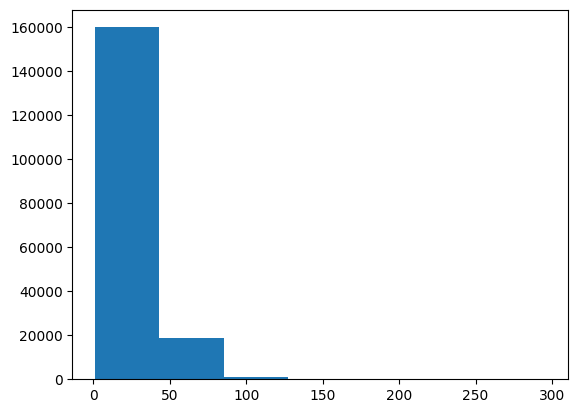

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

Cümlelerin büyük çoğunluğunun uzunluğu 0 ile 50 token arasında gibi görünüyor.

Cümle uzunluklarının %95'ini kapsayan değeri bulmak için NumPy'nin yüzdelik dilimini kullanabiliriz.

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

In [ ]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

Harika! Eğitim setimizdeki cümlelerin %95'inin uzunluğu 55 token veya daha az gibi görünüyor.

Belirteç katmanımızı oluşturduğumuzda, tüm cümlelerimizi aynı uzunlukta dönüştürmek için bu değeri kullanacağız. Uzunluğu 55'in altında olan cümleler sıfırlarla doldurulur ve uzunluğu 55'in üzerinde olan cümleler kesilir (55'ten sonraki kelimeler kesilir).

🤔 Soru: Neden %95?

Eğitim setindeki cümlelerin maksimum cümle uzunluğunu kullanabiliriz.

In [ ]:
# Maximum sentence length in the training set
max(sent_lens)

296

Bununla birlikte, neredeyse hiçbir cümle maksimum uzunluğa yaklaşmadığından, modelimize aktardığımız verilerin çoğunun sıfır olacağı anlamına gelir (maksimum uzunluğun altındaki tüm cümleler sıfırlarla doldurulacağından).

🔑 Not: Bir NLP sorunu için bir metin külliyatı ile çalışırken attığımız adımlar iyi bir uygulamadır. Numunelerinizin ne kadar uzun olduğunu ve bunların dağılımının ne olduğunu bilmek istiyorsunuz. Daha fazla örnek için bkz. bölüm 4 PubMed 200k RCT makalesinin Veri Analizi. https://arxiv.org/pdf/1710.06071

# Metin vektörleştirici oluştur

Artık metinlerimiz hakkında biraz daha bilgimiz var, bunu sayıya dönüştürmenin bir yolunu oluşturalım.

Bunu yapmak için TensorFlow'dan TextVectorization katmanını kullanacağız.

Max_tokens (veri kümemizdeki benzersiz kelimelerin sayısı) ve output_sequence_length (her vektörleştirilmiş cümle için istediğimiz çıktı uzunluğu) hariç tüm parametreleri varsayılan tutacağız.

PubMed 200k RCT makalesinin 3.2. Bölümü, PubMed 20k veri kümesinin kelime boyutunu 68.000 olarak belirtir. Yani bunu max_tokens parametremiz olarak kullanacağız. https://arxiv.org/pdf/1710.06071

Tokenization ile embedding arasındaki fark, embedding daha zengin bir temsildir. Örneğin embedding, eğitim verilerinden geçerken her kelime için üç boyutlu bir vektör oluşturulabilir. Tüm bu değerler, metnimizdeki kelimelerin modelimiz olarak birbirleriyle nasıl ilişkili olduğunu öğrenebilir.

Tokenization, her kelime bir int rakam olabilir, one hot encoding ile 010, 100, 001 gibi matris olabilir. Embedingste 0-1 arası rakamlardan oluşan 3x3 matris oluşabilir.

In [ ]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

Ve 55'lik bir cümle uzunluğunun eğitim cümlelerinin %95'ini kapsadığını keşfettiğimizden, bunu output_sequence_length parametremiz olarak kullanacağız.

In [ ]:
# Create text vectorizer

# After TensorFlow 2.6
from tensorflow.keras.layers import TextVectorization

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=55) # desired output length of vectorized sequences

Harika! Text_vectorizer'ımız hazır gibi görünüyor, hadi onu eğitim verilerine uyarlayalım (eğitim verilerini okusun ve hangi sayının hangi kelimeyi temsil etmesi gerektiğini bulsun) ve ardından test edelim.

Bunu test verilerindeki doğrulamaya uyarlarsak, bu veri kümelerinin görünmemesi amaçlanmıştır. Böylece eğitim verilerine uyum sağladık ve daha sonra doğrulama ve test verilerimize sığdırabiliriz.

In [ ]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
the results show that ta had the greatest impact on risky drinking practices and hangover effects .

Length of text: 17

Vectorized text:
[[    2   117   812    28  2906    55     2  2289   305    18  4746   871
    819     3 31037    71     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


Harika, şimdi dizilerimizi sayılara dönüştürmenin bir yolu var.

🛠Alıştırma: Hücreyi bir düzine kadar kez üzerinde çalıştırmayı deneyin. Uzunluğu 55'ten az olan diziler hakkında ne fark ediyorsunuz?

Text_vectorizer'ımızın get_vocabulary() yöntemini kullanarak metnimiz hakkında birkaç farklı bilgi bulabiliriz.

In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


Ve text_vectorizer'ımızın yapılandırmasını anlamak istersek, get_config() yöntemini kullanabiliriz.

In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

# Özel metin yerleştirme oluştur

Belirteç_vektörleştirme katmanımız, metnimizdeki kelimeleri doğrudan sayılarla eşler. Ancak, bu mutlaka bu sayılar arasındaki ilişkileri yakalamaz.

Metnimizin daha zengin bir sayısal temsilini oluşturmak için bir gömme kullanabiliriz. https://www.tensorflow.org/text/guide/word_embeddings?hl=tr

Modelimiz öğrendikçe (birçok farklı soyut cümle örneğini ve etiketlerini gözden geçirerek), külliyatımızdaki belirteçler arasındaki ilişkileri daha iyi temsil etmek için gömmesini güncelleyecektir.

TensorFlow'un Gömme katmanını kullanarak eğitilebilir bir gömme katmanı oluşturabiliriz.

Bir kez daha, burada ilgilendiğimiz ana parametreler, Gömme katmanımızın giriş ve çıkışlarıdır.

Input_dim parametresi kelime dağarcığımızın boyutunu tanımlar. Ve output_dim parametresi, gömme çıktısının boyutunu tanımlar.

Bir kez oluşturulduktan sonra, gömme katmanımız text_vectorization katmanımızın tamsayı çıktılarını girdi olarak alacak ve bunları output_dim boyutu vektörlerine dönüştürecektir.

Bunu iş başında görelim.

- output dim --> 32,64, 128'in gibi 8'in katları olmalı.
- Her ne kadar büyük gömülürse modelin eğitmesi gereken parametre sayısı o kadar fazla olur.
- mask_zero: Boolean değerdir. input_value=0. Özel bir padding. RNN kullanımı çeşitli uzunlukta giriş verileri kullanılırken elverişlidir. Eğer true ise modeldeki tüm subsequent katmanlar maskelenmeli. Daha verimli hesaplama için TRUE olmalı.
- Çıktıyı incele, çok sıfır var o zaman verimli bir model (obe_hot benzeri).

- token_embeding --> Token yerleştirme katmanına herhangi bir şey aktarmadan önce bunun sayısal biçimde olması gerekli.
- Gömülü cümle şeklinde her bir dizi uzunluğunda rakamlardan 55 adet var her biri 128 vektör uzunluğunda.

In [ ]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding")

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
the results show that ta had the greatest impact on risky drinking practices and hangover effects .

Sentence after vectorization (before embedding):
[[    2   117   812    28  2906    55     2  2289   305    18  4746   871
    819     3 31037    71     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[-0.03742189  0.04519233 -0.04743247 ... -0.00782454  0.00720356
   -0.03978801]
  [-0.03464318 -0.02600943  0.01602042 ...  0.02787316 -0.02455582
    0.03628517]
  [ 0.02106059 -0.02171903  0.00117943 ... -0.04986173 -0.02140907
    0.0099216 ]
  ...
  [-0.03375705  0.01014236 -0.00080926 ... -0.03642828 -0.02278515
    0.0145144 ]
  [-0.03375705  0.01014236 -0.00080926 ... -0.03642828 -0.02278515
    0.0145144 ]
  [-0.03375705  0.01014236 -0

# Veri kümeleri oluşturun (mümkün olduğunca hızlı)

Bir makine öğrenimi modeliyle kullanılmak üzere veri kümelerimizi önceden işleme zahmetini yaşadık, ancak modellerimizle daha hızlı çalışmasını sağlamak için kullanabileceğimiz birkaç adım var.

Yani, tf.data API, daha hızlı veri yüklemesini sağlayan yöntemler sağlar.

📖 Kaynak: TensorFlow'da veri yüklemeyle ilgili en iyi uygulamalar için aşağıdakilere göz atın:

- tf.data: TensorFlow giriş boru hatları oluşturun https://www.tensorflow.org/guide/data?hl=tr

- tf.data API ile daha iyi performans https://www.tensorflow.org/guide/data_performance?hl=tr

Verilerimizle kullanmak isteyeceğimiz ana adımlar, onu bir PrefetchDataset gruplarına dönüştürmektir.

Bunu yaparak TensorFlow'un verilerimizi GPU'ya mümkün olduğunca hızlı bir şekilde yüklemesini ve daha hızlı eğitim süresine yol açmasını sağlayacağız.

Toplu bir PrefetchDataset oluşturmak için batch() ve prefetch() yöntemlerini kullanabiliriz, tf.data.AUTOTUNE parametresi ayrıca TensorFlow'un veri kümelerini hazırlamak için kullanılacak en uygun işlem miktarını belirlemesine izin verecektir.

* https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch
* https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch
* https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE

##### Aşağısı için;

- test_dataset --> Test cümleleri ile çalışıyoruz. Bu ayrı bir listedir.
- Hepsi etiket dizesidir.
- Eğitim veri seti, veri setini dilimleme eğilimindedir. Yani artık test veri kümelerindeki eğitim doğrulamalarındaki örneklerin her biri artık veri kümelerini dilimleme eğiliminde.
- Çıktıdaki şekil (None, (5)) tuple tarzındadır. One hot eğitim verisi bir üst şekli etiketler.
- train_labels_one_hot.shape, train_labels_one_hot[0] 180040 adet örneğin tamamı için 0 ve 1 dizisi var. 1 pozitif değer o yüzden 1 tane 5 var.

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

- Batch ile veri setinin modele yüklenmesi daha verimli olur.
## Prefetching slaytını buraya yerleştir.
- buffer_size --> Bir seferde kaç tane numuneyi önceden getirmemiz gerekir?
- Aşağıdaki kodlar ile otomatik olarak çok sayıda veriyi önceden getirebiliriz ve eğitim veri setini karıştırmıyoruz. Çünkü eğitim veri setindeki örnekler sırası aslında yapmaya çalıştığımız şey için önemli.
- Modelin dizilim sırasını öğrenmesini isteriz.
- Gerçek veri seti otomatik ayarlama sırasında 32 adet önceden veri getiren ve aynı şeyi yapan geçerli veri setine eşit.
- Tüm veri setlerinin önceden getirildiğinden, eşleştirildiğinden ve aktarılmaya hazır olduğundan emin olmak için bir modeldir.

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

# Model 1: Jeton gömmeli Conv1D

Pekala, artık metnimizi ve etiketlerimizi sayısal olarak temsil etmenin bir yolu var, temel çizgimizi denemek ve geliştirmek için bir dizi derin model oluşturma zamanımız var.

Tüm derin modellerimiz benzer bir yapı izleyecektir:

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

Baştan sona değiştireceğimiz ana bileşen Katmanlar bileşenidir. Çünkü herhangi bir modern derin NLP modeli, içinde anlamlı kalıplar keşfedilmeden önce metnin bir gömmeye dönüştürülmesini gerektirir.

İnşa edeceğimiz ilk model, 1 boyutlu bir Evrişimli Sinir Ağıdır.

Ayrıca standart makine öğrenimi iş akışını da takip edeceğiz:

* Model oluştur

* Tren modeli

* Modeli değerlendirin (tahminlerde bulunun ve temel gerçekle karşılaştırın)

- test_vectors --> metin girdisini vektörleştirir veya tamsayılarla eşleştirir.
- kernel_size --> 5 verildi. Aynı anda 5 tokene birden bakılır. Yani beşer kelime ile ilerlenir.
- Global tek boyutlu çalıştığımıza dikkat.
- Çok sınıflı sınıflandırmadan dolayı softmax ve crossentropy kullanıldı.

In [ ]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get summary of Conv1D model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

Harika! İlk derin sekans modelimizi inşa ettik ve kullanıma hazırız.

Model özetini kontrol ederken, eğitilebilir parametrelerin çoğunun gömme katmanı içinde olduğunu fark edeceksiniz. Gömmenin boyutunu artıracak olsaydık (Gömme katmanının output_dim parametresini artırarak), eğitilebilir parametrelerin sayısı önemli ölçüde artardı.

Modelimizi eğitim verilerine uydurmanın zamanı geldi, ancak dikkatli bir değişiklik yapacağız.

Eğitim verilerimiz yaklaşık 200.000 cümle içerdiğinden, bir GPU ile bile derin bir modele uyum biraz zaman alabilir. Bu nedenle, deneylerimizi hızlı tutmak için onları eğitim veri kümesinin bir alt kümesinde çalıştıracağız.

Daha spesifik olarak, eğitilecek eğitim setinin yalnızca ilk %10'unu (yaklaşık 18.000 örnek) ve doğrulamak için doğrulama setindeki partilerin ilk %10'unu kullanacağız.

🔑 Not: Modellerinizi daha büyük miktarda veriye ölçeklendirmeden önce çalıştıklarından emin olmak için önce daha küçük veri alt kümeleri üzerinde test etmek makine öğreniminde standart bir uygulamadır. Sadece bir avuç büyük deney yerine çok sayıda küçük deney yapmayı hedeflemelisiniz. Ve zamanınız sınırlı olduğundan, daha küçük deneyler yürütmenin en iyi yollarından biri, üzerinde çalıştığınız veri miktarını azaltmaktır (benzer bir dağılımı kapsadığı sürece, tam veri kümesinin %10'u genellikle iyi bir miktardır).

- Veri kümesini zaten sığacak şekilde önceden biçimlendirmiştik.
- her dönem için adımların %10'unu atarız. Yani modelin partilerin yalnızca %10'una bakmasını istedik.
- Hızlı yapmak için bunu yaptık. Sonuca bakıp hatanın nerede olduğunu anlamak için mümkün olduğunca baştan modeli kısa tuttuk. Denemeleri beş dk altında yapmaya çalıştık.

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 22s 32ms/step - loss: 0.9044 - accuracy: 0.6424 - val_loss: 0.6750 - val_accuracy: 0.7407
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 0.6529 - accuracy: 0.7587 - val_loss: 0.6247 - val_accuracy: 0.7763
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6148 - accuracy: 0.7747 - val_loss: 0.5972 - val_accuracy: 0.7859


Mükemmel! İlk eğitimli derin dizi modelimize sahibiz ve çok uzun sürmedi (ve toplu verilerimizi önceden getirmeseydik, daha uzun sürerdi).

Modelimizle bazı tahminlerde bulunma ve ardından değerlendirme zamanı.

In [ ]:
# Evaluate on whole validation dataset (we only validated on 10% of batches during training)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5975 - accuracy: 0.7851


[0.5974754095077515, 0.7851185202598572]

5 çıkış nöronlu çıkış katmanını olduğuna dikkat.

In [ ]:
# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[4.5350292e-01, 1.5268451e-01, 5.1064614e-02, 3.1896669e-01,
        2.3781238e-02],
       [4.2298776e-01, 3.2249162e-01, 1.3181584e-02, 2.2843315e-01,
        1.2905969e-02],
       [1.6796981e-01, 4.8694215e-03, 2.0715173e-03, 8.2504600e-01,
        4.3267570e-05],
       ...,
       [5.0882604e-06, 6.4331025e-04, 7.4563478e-04, 3.8982062e-06,
        9.9860209e-01],
       [4.9294360e-02, 5.0346988e-01, 7.8770652e-02, 5.0562967e-02,
        3.1790212e-01],
       [1.7661135e-01, 6.7972195e-01, 4.4538587e-02, 4.6248626e-02,
        5.2879483e-02]], dtype=float32)

Her bir dizideki max değerin indeksini verir.

In [ ]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.51184959618695,
 'precision': 0.7820725119484493,
 'recall': 0.7851184959618694,
 'f1': 0.7826269979016853}

# Model 2: Önceden eğitilmiş belirteç gömmeleri ile özellik çıkarma

Kendi gömmelerimizi eğitmek, deneylerimizi yavaşlatarak çalışması biraz zaman aldı.

Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağlarındaki model mimarisini çoğaltmaya doğru ilerlediğimiz için, belirteç gömmelerini başlatmanın bir yolu olarak önceden eğitilmiş bir GloVe gömme kullandıklarından bahseder.
* https://arxiv.org/pdf/1612.05251
* https://nlp.stanford.edu/projects/glove/

Bunu taklit etmek için, TensorFlow Hub'dan önceden eğitilmiş Evrensel Cümle Kodlayıcı gömmeleriyle hangi sonuçları alabileceğimizi görelim. https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder/2?tfhub-redirect=true

🔑 Not: GloVe gömmelerini kağıda göre kullanabiliriz, ancak TensorFlow ile çalıştığımız için TensorFlow Hub'da bulunanları kullanacağız (GloVe gömmeleri değil). Önceden eğitilmiş GloVe gömmelerini uzantı olarak kullanarak tasarruf edeceğiz. https://keras.io/examples/nlp/pretrained_word_embeddings/

Model yapısı şöyle görünecektir:

Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)

Önceki bir modelde kullandığımız tokenizasyon katmanının eksikliğini fark edeceksiniz. Bunun nedeni, Evrensel Cümle Kodlayıcısının (USE) bizim için tokenizasyonla ilgilenmesidir.

Bu tür bir modele transfer öğrenimi veya daha spesifik olarak özellik çıkarma transfer öğrenimi denir. Başka bir deyişle, bir modelin başka bir yerde öğrendiği kalıpları almak ve bunu kendi sorunumuza uygulamak.

TensorFlow Hub'dan önceden eğitilmiş bir gömme kullanarak oluşturduğumuz özellik çıkarıcı modeli.

Önceden eğitilmiş USE'ı modelimizde kullanabileceğimiz bir katmana indirmek için hub.KerasLayer sınıfını kullanabiliriz.

Önceden eğitilmiş gömmeleri donmuş tutacağız (eğitilebilir=Yanlış ayarlayarak) ve model çıktılarını kendi verilerimize göre uyarlamak için üste eğitilebilir birkaç katman ekleyeceğiz.

🔑 Not: Nispeten büyük bir modeli (~916MB) indirmek zorunda kaldığından, aşağıdaki hücrenin çalışması biraz zaman alabilir. https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer

trainable = False --> Bu sadece özellik çıkarımı (feature extracting) kullanıldığı için ... Burada ince ayar yapmadık.

In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

Güzel, şimdi önceden eğitilmiş KULLANIM'ımız indirildi ve bir hub olarak örneklendi.KerasLayer örneği, rastgele bir cümle üzerinde test edelim.

burada vektörleşmeye gerek yok.

In [ ]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
in the prednisolone arm , a significantly higher proportion exceeded the defined iop elevation threshold ( @ % vs. @ % , p = @ ) , and glaucoma medications were initiated or increased more often ( @ % vs. @ % , p = @ ) .

Sentence after embedding:
[ 0.00497991 -0.02959559  0.05909719 -0.03945985 -0.02711803  0.03689428
  0.04935927 -0.05415955  0.06088148  0.04126745  0.08186784  0.07972702
  0.04983548  0.02305125  0.07145227 -0.05414707 -0.08237445  0.01710972
  0.03582541 -0.01061846  0.0781955   0.00976987 -0.05994548  0.01212411
  0.07372912  0.05618613  0.02525093 -0.0167991  -0.07665797  0.02936533] (truncated output)...

Length of sentence embedding:
512


Güzel! Daha önce de belirttiğimiz gibi, TensorFlow Hub'ın önceden eğitilmiş USE modülü, metnimizi bizim için belirteçlemeye özen gösterir ve 512 boyutlu bir gömme vektörü çıkarır.

Bir araya getirelim ve tf_hub_embedding_layer'ımızı kullanarak bir model derleyelim.

# TensorFlow Hub'dan bir NLP özellik çıkarma modeli oluşturma ve takma

- Girişler katman şeklinde çünkü giriş şekli boş bir liste. Simgeleştirilmiş bir yerleştirme katmanı oluşturduğumuzda, simge düzeyinde bir yerleştirme var ve her token 128'e çevirdik. Bu da tüm diziyi tek uzun vektöre dönüştürdü.
- relu --> Lineer olmayan aktivasyon ...
- Modeli iyileştirme yollarından birisi de araya katman koymaktır. Girdilerden gömme oluşturulabilir. Gömme arasına bir grup katman eklenebilir.
- Deney yaptığımız için bu çalışmada büyük bir katman oluşturmadık. Karmaşıklık her zaman arttırılabilir.
- Eğitilebilir parametreler yoğun katmandadır. Eğitilebiliri açarsan modelin daha çok kalıp bulması gerektiği anlamına gelir.
- Özellik çıkarmada katman sayısı arttıkça deney uzun sürer. Tüm parametreler dondurulmuş olduğu için hızlı eğitim oldu.

In [ ]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


Modelimizin özetini kontrol ederek çok sayıda toplam parametre olduğunu görebiliriz, ancak bunların çoğu eğitilemez. Bunun nedeni, USE özellik çıkarıcı katmanımızı yerleştirdiğimizde training=False'i ayarlamamızdır.

Bu nedenle, modelimizi eğittiğimizde, yalnızca en iyi iki çıkış katmanı eğitilecektir.

In [ ]:
# Fit feature extractor model for 3 epochs
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 12s 15ms/step - loss: 0.9134 - accuracy: 0.6502 - val_loss: 0.7952 - val_accuracy: 0.6905
Epoch 2/3
562/562 [==============================] - 9s 15ms/step - loss: 0.7699 - accuracy: 0.7008 - val_loss: 0.7554 - val_accuracy: 0.7058
Epoch 3/3
562/562 [==============================] - 9s 16ms/step - loss: 0.7540 - accuracy: 0.7115 - val_loss: 0.7390 - val_accuracy: 0.7154


In [ ]:
# Evaluate on whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7432 - accuracy: 0.7123


[0.743226170539856, 0.7122666239738464]

Kendi özel gömme katmanımızı eğitmediğimiz için eğitim çok daha hızlıdır.

Bazı tahminlerde bulunalım ve özellik çıkarma modelimizi değerlendirelim.

tahmin etiketleri (rakamlar) en yüksek olan modelin belirli bir cümleyle ilişkilendirme olasılığının en yüksek olduğunu düşündüğü cümledir. Pooling eklenerek yükselebilir, katman eklenebilir.

In [ ]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 10s 10ms/step


array([[4.0046996e-01, 3.9608353e-01, 3.1003817e-03, 1.8950954e-01,
        1.0836623e-02],
       [3.6482051e-01, 4.6634197e-01, 5.0247796e-03, 1.6075698e-01,
        3.0557169e-03],
       [2.4858898e-01, 1.2626658e-01, 1.7173460e-02, 5.7200366e-01,
        3.5967283e-02],
       ...,
       [2.2320328e-03, 5.4576411e-03, 6.2854342e-02, 8.8110380e-04,
        9.2857486e-01],
       [3.6124818e-03, 4.2770397e-02, 2.0512339e-01, 1.3166309e-03,
        7.4717706e-01],
       [1.9051018e-01, 2.3421653e-01, 5.1770937e-01, 4.5676841e-03,
        5.2996174e-02]], dtype=float32)

In [ ]:
# Convert the predictions with feature extraction model to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
# Calculate results from TF Hub pretrained embeddings results on validation set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 71.2266649013637,
 'precision': 0.7134084112377521,
 'recall': 0.712266649013637,
 'f1': 0.7092514260553279}

# Model 3: Karakter gömmeli Conv1D

### Karakter düzeyinde bir belirteç oluşturma

Medical Paper Abstracts makalesinde Ortak Cümle Sınıflandırması için Sinir Ağları, modellerinin belirteç ve karakter gömmelerinin bir karışımını kullandığından bahseder. https://arxiv.org/pdf/1612.05251

Özel bir belirteç gömme ve önceden eğitilmiş bir belirteç gömme ile modeller oluşturduk, bir karakter gömme kullanarak bir tane oluşturmaya ne dersiniz?

Bir karakter ve belirteç gömme arasındaki fark, karakter gömmenin karakterlere bölünmüş diziler kullanılarak oluşturulmasıdır (örneğin, merhaba -> [h, e, l, l, o]), burada bir belirteç gömme, belirteçlere bölünmüş diziler üzerinde oluşturulur.

Belirteç seviyesi, dizileri belirteçlere (kelimelere) böler ve her birini gömer, karakter gömer, dizileri karakterlere böler ve her biri için bir özellik vektörü oluşturur.

TextVectorization sınıfını kullanarak önce dizilerimizi (karakterlere ayrıldıktan sonra) vektörleştirerek ve ardından bu vektörleştirilmiş dizileri bir Gömme katmanından geçirerek karakter düzeyinde bir gömme oluşturabiliriz.

Dizilerimizi bir karakter düzeyinde vektörleştirmeden önce onları karakterlere ayırmamız gerekecek. Bunu yapmak için bir işlev yazalım.

- belirteç = token...
- karakter embedding --> her bir hard feature vector'e dönüşür.
- Yukarıda oluşturduğumuz vektörler kelime içindi. Bu çalışma için verileri karakter olarak biçimlendirme gerekli.
- Her karakteri, harfi bir tam sayıya dönüştürür.

In [ ]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)

'i n   t h e   p r e d n i s o l o n e   a r m   ,   a   s i g n i f i c a n t l y   h i g h e r   p r o p o r t i o n   e x c e e d e d   t h e   d e f i n e d   i o p   e l e v a t i o n   t h r e s h o l d   (   @   %   v s .   @   %   ,   p   =   @   )   ,   a n d   g l a u c o m a   m e d i c a t i o n s   w e r e   i n i t i a t e d   o r   i n c r e a s e d   m o r e   o f t e n   (   @   %   v s .   @   %   ,   p   =   @   )   .'

Harika! Karakter bölme işlevimiz çalışıyor gibi görünüyor. Dizi veri kümelerimizi karakterlere bölerek karakter düzeyinde veri kümeleri oluşturalım.

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


Vektörleştirilmiş karakter dizilerimizin ne kadar uzun olması gerektiğini anlamak için, karakter dizisi uzunluklarımızın dağılımını kontrol edelim.

In [ ]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

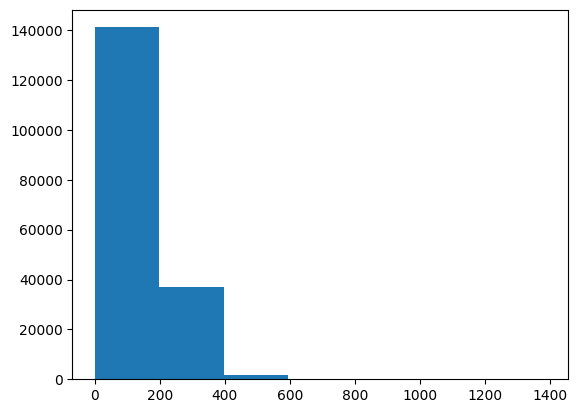

In [ ]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

Tamam, dizilerimizin çoğu 0 ila 200 karakter uzunluğunda gibi görünüyor.

Dizilerimizin %95'ini hangi uzunluğun kapsadığını bulmak için NumPy'nin yüzdelik dilimini kullanalım.

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

Harika, şimdi dizilerin %95'ini kapsayan dizi uzunluğunu biliyoruz, bunu TextVectorization katmanımızda output_sequence_length parametresi olarak kullanacağız.

🔑 Not: En uygun output_sequence_length'in ne olması gerektiğini bulmak için burada deney yapabilirsiniz, belki de ortalama sonuçları %95 yüzdelik dilim kullanmak kadar iyi sonuçlar elde edebilirsiniz.

Max_tokens'i (dizilerimizdeki farklı karakterlerin toplam sayısı) 28, başka bir deyişle, alfabenin 26 harfi + boşluk + OOV (kelime dağarcığı dışında veya bilinmeyen) belirteçleri olarak ayarlayacağız.

ascii --> tüm küçük harfleri aldık.

Aşağıdaki işlem neden önemli? Bunun uzunluğunu alabiliriz ve bu, karakter seviyesi mağduriyetimiz için üslerimizi kapsayacaktır.
Bu yüzden klavyedeki her karakter burada ele alınmalıdır.

In [ ]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

oov --> out of vocab, [UNK] unknown.

standardize --> giriş metnini uygulamak için standardizasyon için isteğe bağlı spesifikasyondur. None veya lower_and....olabilir.



In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

Güzel! Şimdi char_vectorizer'ımızı karakter düzeyindeki dizilerimize uyarladık, get_vocabulary() yöntemini kullanarak bununla ilgili bazı özellikleri kontrol edelim.

standardizasyon None olsaydı, çıktı;

- 57
- '', [UNK], 'e', 't', 'i'
- 'I', '"', ']', '//', ...olurdu.

Yani none ile noktalama işaretlerini terketmiş olursunuz.





In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


Çalıştığından emin olmak için rastgele karakter dizileri üzerinde de test edebiliriz.

In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
f u t u r e   i n t e r v e n t i o n s   s h o u l d   c o n s i d e r   t h e   r o l e   o f   h e a l t h   l i t e r a c y   i n   p r o m o t i n g   i n j u r y   p r e v e n t i o n   .

Length of chars: 84

Vectorized chars:
[[17 16  3 16  8  2  4  6  3  2  8 21  2  6  3  4  7  6  9  9 13  7 16 12
  10 11  7  6  9  4 10  2  8  3 13  2  8  7 12  2  7 17 13  2  5 12  3 13
  12  4  3  2  8  5 11 19  4  6 14  8  7 15  7  3  4  6 18  4  6 27 16  8
  19 14  8  2 21  2  6  3  4  7  6  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0

Uzunluğu 290'dan (output_seq_char_length) daha kısa olan dizilerin sonunda sıfırlarla doldurulduğunu fark edeceksiniz, bu da modelimize geçirilen tüm dizilerin aynı uzunlukta olmasını sağlar.

Ayrıca, TextVectorization'ın standartlaştırma parametresinin "lower_and_strip_punctuation" ve bölünmüş parametrenin varsayılan olarak "whitespace" olması nedeniyle, semboller (@ gibi) ve boşluklar kaldırılır.

🔑 Not: Noktalama işaretlerinin kaldırılmasını istemediyseniz (@, % vb. tutun), özel bir standardizasyon çağrılabilir oluşturabilir ve bunu standartlaştırma parametresi olarak geçirebilirsiniz. Daha fazla bilgi için TextVectorization katmanı belgelerine bakın.

# Karakter düzeyinde bir gömme oluşturma

Karakter düzeyindeki dizilerimizi vektörleştirmenin bir yolu var, şimdi bir karakter düzeyinde gömme oluşturma zamanı.

Tıpkı özel belirteç gömmemiz gibi, bunu tensorflow.keras.layers.Embedding sınıfını kullanarak yapabiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

Karakter düzeyinde gömme katmanımız bir giriş boyutu ve çıkış boyutu gerektirir.

Giriş boyutu (input_dim), char_vocab'ımızdaki (28) farklı karakterlerin sayısına eşit olacaktır. Ve Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları Şekil 1'deki modelin yapısını takip ettiğimizden, karakter gömmenin (output_dim) çıktı boyutu 25 olacaktır. https://arxiv.org/pdf/1612.05251

dokümanda, input_dim --> int. Kelime haznesidir. Örneğin max tamsayı indexi +1 gibi.

output_dim --> int. Yoğun gömmenin şekilsel boyutu.

In [ ]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
f u t u r e   i n t e r v e n t i o n s   s h o u l d   c o n s i d e r   t h e   r o l e   o f   h e a l t h   l i t e r a c y   i n   p r o m o t i n g   i n j u r y   p r e v e n t i o n   .

Embedded chars (after vectorization and embedding):
[[[-0.00804998 -0.03078482  0.02936046 ... -0.03349607  0.04212847
   -0.00902678]
  [ 0.01195908 -0.02387935  0.01971792 ...  0.04171995  0.0353037
    0.02558834]
  [-0.02780032  0.0073716  -0.02678081 ...  0.0077134   0.03727556
    0.01433602]
  ...
  [-0.02112738  0.02913321  0.04687997 ... -0.03959308  0.00380766
   -0.04945362]
  [-0.02112738  0.02913321  0.04687997 ... -0.03959308  0.00380766
   -0.04945362]
  [-0.02112738  0.02913321  0.04687997 ... -0.03959308  0.00380766
   -0.04945362]]]

Character embedding shape: (1, 290, 25)


Dizilerimizdeki karakterlerin her biri 25 boyutlu bir gömmeye dönüştürülür.

her bir harf özellik vektörüne dönüştü.

290 uzunluğa kadar sıfırlarla doldurulur. 1 dizi var, 290 karakter var (char vectorizer kaç harf olursa olsun 290'a kadar padding yapar), 25 gömme karakteri.


# Karakter gömmelerine uyacak bir Conv1D modeli oluşturma

Şimdi karakter düzeyindeki dizilerimizi sayılara (char_vectorizer) dönüştürmenin ve onları bir gömme (char_embed) olarak sayısal olarak temsil etmenin bir yolu var, karakter düzeyinde bir dizi modeli oluşturarak dizilerimizdeki bilgileri kodlamada ne kadar etkili olduklarını test edelim.

Model, özel belirteç yerleştirme modelimizle (model_1) aynı yapıya sahip olacaktır, ancak belirteç düzeyinde diziler yerine karakter düzeyinde diziler giriş olarak alacaktır.

Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)

In [ ]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

Modelimizi verilere sığdırmadan önce, karakter düzeyinde toplu PrefetchedDataset'ler oluşturacağız.

In [ ]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 6ms/step - loss: 1.2843 - accuracy: 0.4856 - val_loss: 1.0526 - val_accuracy: 0.5938
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 1.0002 - accuracy: 0.6045 - val_loss: 0.9365 - val_accuracy: 0.6297
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.9184 - accuracy: 0.6423 - val_loss: 0.8620 - val_accuracy: 0.6616


In [ ]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.8796 - accuracy: 0.6594


[0.8795744180679321, 0.6594399809837341]

Güzel! Karakter düzeyindeki modelimiz çalışıyor gibi görünüyor, onunla bazı tahminlerde bulunalım ve değerlendirelim.

In [ ]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.14670706, 0.26414698, 0.10993239, 0.42251855, 0.0566951 ],
       [0.17952669, 0.61284536, 0.04472806, 0.05347157, 0.10942832],
       [0.13054176, 0.18297566, 0.32385087, 0.32372358, 0.03890812],
       ...,
       [0.01579976, 0.03398993, 0.22404483, 0.02109311, 0.70507234],
       [0.06259605, 0.19586767, 0.28120074, 0.05509917, 0.4052364 ],
       [0.40614358, 0.36372653, 0.1394411 , 0.0765835 , 0.01410534]],
      dtype=float32)

In [ ]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 2, ..., 4, 4, 0])>

In [ ]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 65.94399576327287,
 'precision': 0.6525733371595827,
 'recall': 0.6594399576327287,
 'f1': 0.6498297077690731}

# Model 4: Önceden eğitilmiş token gömmelerini + karakter gömmelerini birleştirme (hibrit gömme katmanı)

Pekala, şimdi işler baharatlı olacak.

Medical Paper Abstracts'da Ortak Cümle Sınıflandırması için Sinir Ağları Şekil 1'dekine benzer bir model oluşturmaya yaklaşırken, bahsettikleri hibrit belirteç gömme katmanını ele almanın zamanı geldi. https://arxiv.org/pdf/1612.05251

Bu karma belirteç gömme katmanı, belirteç gömme ve karakter gömmelerinin bir kombinasyonudur. Başka bir deyişle, dizileri sıra etiketi tahmin katmanına geçirmeden önce temsil etmek için yığılmış bir gömme oluştururlar.

Şimdiye kadar belirteç ve karakter düzeyinde gömmeler kullanan iki model geliştirdik, ancak bu iki model bu gömmelerin her birini özel olarak kullandı.

Şekil 1'deki modeli çoğaltmaya (veya çoğaltmaya yaklaşmaya) başlamak için aşağıdaki adımlardan geçeceğiz:

1. Token düzeyinde bir model oluşturun (model_1'e benzer)

2. Karakter düzeyinde bir model oluşturun (kağıdı yansıtmak için hafif bir değişiklikle model_3'e benzer)

3. 1 ve 2'nin çıktılarını birleştirin (layers.Concatenate) https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate

4. Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları'nın Şekil 1 ve bölüm 4.2'ye benzer 3'ün üzerine bir dizi çıktı katmanı oluşturun

5. Token ve karakter düzeyinde dizileri girdi olarak alan ve çıktı olarak sıra etiketi olasılıkları üreten bir model oluşturun

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

4.2 ile ilgili olarak; model, stokastik gradyan iniş kullanılarak eğitilir ve her gradyan adımında tüm parametreler, yani jeton yerleştirmeleri, karakter yerleştirmeleri, çift yönlü LSTM parametreleri ve geçiş olasılıkları güncellenir. Düzenleme için, karakter geliştirilmiş token yerleştirmelerine ve etiket tahmin katmanından önce 0,5 oranında bırakma uygulanır.

5 --> bu sıralı API ile değil fonksiyonel API ile oluşturduk. Bu yüzden token modeli girişine ihtiyacımız var ve bunu da kullanabilmek için char model girişi kullanılmalı.

In [ ]:
# Get summary of token and character model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

Aslında yapılan iki model oluşturuldu, çıktılar birleştirildi, bir token ve bir karakter çıktısı birleşti ve sonra bunlar üzerine bazı katmanlar ekledik.

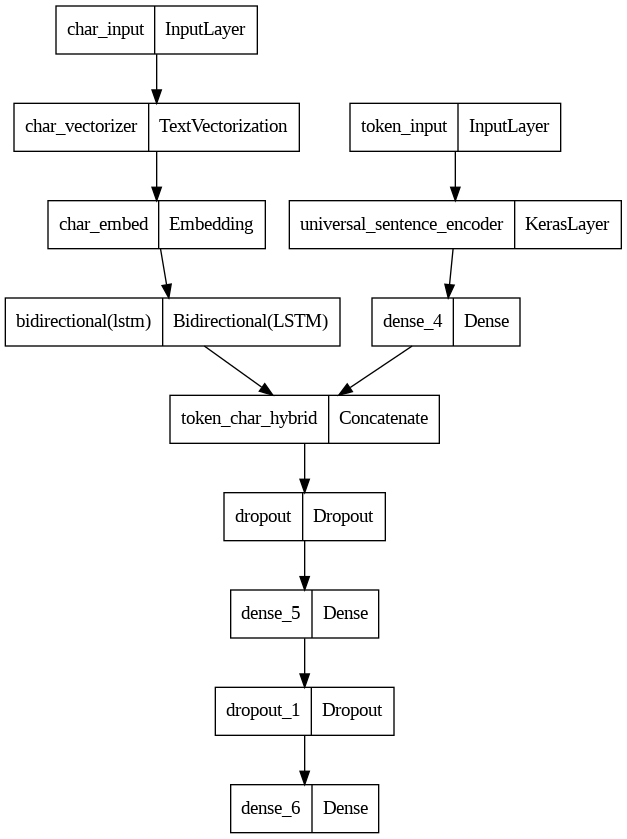

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

Şimdi bu iyi görünümlü bir model. Modellerimizin geri kalanına sahip olduğumuz gibi derleyelim.

🔑 Not: Medical Paper Abstracts'ta Ortak Cümle Sınıflandırması için Sinir Ağları Bölüm 4.2, SGD (stokastik gradyan iniş) optimize ediciyi kullanarak bahseder, ancak diğer modellerimizle tutarlı kalmak için Adam optimizer'ı kullanacağız. Bir alıştırma olarak, tf.keras.optimizers.Adam yerine tf.keras.optimizers.SGD kullanmayı deneyebilir ve sonuçları karşılaştırabilirsiniz.

- https://arxiv.org/pdf/1612.05251
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

Ve yine, deneylerimizi hızlı tutmak için, token-character-hybrid modelimizi eğitimin %10'una sığdıracağız ve doğrulama gruplarının %10'unu doğrulayacağız. Bununla birlikte, bu model ile fark, iki girdi, belirteç düzeyinde diziler ve karakter düzeyinde diziler gerektirmesidir.

Bunu, ilk girdi olduğu gibi bir demet ile bir tf.data.Dataset oluşturarak yapabiliriz, örneğin:

((Token_data, char_data), (etiket))

Bunu iş başında görelim.

# Token ve karakter verilerini bir tf.data veri kümesinde birleştirme

zip kodu ile iki farklı veri kümesi birleştirilir.

hızlı deney yapma hedefiyle val...kodları yazıldı.

Token model girdisine ve char model girdisine nasıl sahip olduğumuza dikkat. Token seviyesinde veriler vardı, cümleleri eğittik ve traine aldık. Yani bu modelin inşa edildiği sırayla aynı. Aksi takdirde, farklı bir sırayla iletirsek, modelimiz belirteç seviyesi modelini kullanmaya çalışabilir.

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset


(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

# Token ve karakter düzeyindeki dizilere bir model takmak

hızlı olması için 3 epoch'ta bıraktık.

doğrulama veri setinin %10'unu doğrulayacağız.

In [ ]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 30s 39ms/step - loss: 0.9793 - accuracy: 0.6075 - val_loss: 0.7731 - val_accuracy: 0.6988
Epoch 2/3
562/562 [==============================] - 21s 37ms/step - loss: 0.7831 - accuracy: 0.6981 - val_loss: 0.7099 - val_accuracy: 0.7304
Epoch 3/3
562/562 [==============================] - 22s 39ms/step - loss: 0.7649 - accuracy: 0.7089 - val_loss: 0.6822 - val_accuracy: 0.7463


In [ ]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.6884 - accuracy: 0.7389


[0.6884146928787231, 0.7389116883277893]

Güzel! Jeton-karakter hibrit modelimiz hayat buldu!

Onunla tahminlerde bulunmak için, çoklu girdiler aldığı için, predict() yöntemini belirteç düzeyinde diziler ve karakter düzeyinde dizilerden oluşan bir demet geçirebiliriz.

Daha sonra tahminleri daha önce yaptığımız gibi değerlendirebiliriz.

In [ ]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 19s 19ms/step


array([[4.8437497e-01, 2.8186223e-01, 3.9808974e-03, 2.2409682e-01,
        5.6849886e-03],
       [3.3021954e-01, 4.8030534e-01, 4.3293838e-03, 1.8304074e-01,
        2.1049688e-03],
       [2.9702640e-01, 1.3865821e-01, 6.0653888e-02, 4.6788013e-01,
        3.5781443e-02],
       ...,
       [6.0831587e-04, 6.4504277e-03, 5.5881247e-02, 1.7279369e-04,
        9.3688720e-01],
       [5.5852984e-03, 5.2003253e-02, 1.5944619e-01, 2.8186822e-03,
        7.8014660e-01],
       [3.7063694e-01, 2.6162291e-01, 2.8209108e-01, 3.9810058e-02,
        4.5839034e-02]], dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [ ]:
# Get results of token-char-hybrid model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.89116907189197,
 'precision': 0.7376808705274569,
 'recall': 0.7389116907189196,
 'f1': 0.7363186287619419}

# Model 5: Önceden eğitilmiş token gömmeleri + karakter gömmeleri + konumsal gömmeler ile Öğrenmeyi Aktarın

Token gömmelerini ve karakter gömmelerini birleştirmek modelimize biraz performans artışı sağladı gibi görünüyor.

Ama ekleyebileceğimiz bulmacanın bir parçası daha var.

Ya kendi özelliklerimizi modele dönüştürseydik?

Yani, modelimize örneklerimiz hakkında daha fazla bilgi vermek için veriler hakkında kendi bilgimizi alıp sayısal bir şekilde kodlasaydık ne olur?

Bir modele girdi olarak özellikler oluşturmak için kendi bilginizi uygulama sürecine özellik mühendisliği denir.

Sınıflandırmaya çalıştığımız diziler hakkında önemli bir şey düşünebiliyor musunuz?

Bir özete bakacak olsaydınız, cümlelerin sırayla görünmesini bekler miydiniz? Yoksa sırayla görünmeleri mantıklı mı? Örneğin, begging'de SONUÇLAR olarak etiketlenmiş diziler ve sonunda HEDEF olarak etiketlenmiş diziler?

Özetler tipik olarak sıralı bir sırada gelir, örneğin:

- OBJECTIVE ...
- METHODS ...
- METHODS ...
- METHODS ...
- RESULTS ...
- CONCLUSIONS ...

ya da;

- BACKGROUND ...
- OBJECTIVE ...
- METHODS ...
- METHODS ...
- RESULTS ...
- RESULTS ...
- CONCLUSIONS ...
- CONCLUSIONS ...

Tabii ki, dizi etiketlerinin kendilerini eğitim verilerine dönüştüremeyiz (test zamanında bunlara sahip değiliz), ancak bir dizi dizinin sırasını soyut olarak kodlayabiliriz.

Örneğin,

- Sentence 1 of 10 ...
- Sentence 2 of 10 ...
- Sentence 3 of 10 ...
- Sentence 4 of 10 ...

Bunu preprocess_text_with_line_numbers() işlevimizi oluşturduğumuzda fark etmiş olabilirsiniz. Bir özet metin dosyasında okuduğumuzda, bir özetteki satır sayısını ve her satırın kendisinin sayısını saydık.

Bunu yapmak, DataFrames'lerimizin "line_number" ve "total_lines" sütunlarına yol açtı.


Feature Engineering
- Verilerden kesin olmayan özellikleri alıp rakamlara dönüştürme (amaç modelin öğrenmesi).
- Modele nasıl fazladan veri kaynağı ekleyebiliriz?



In [ ]:
# Inspect training dataframe
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


"Line_number" ve "total_lines" sütunları, mutlaka eğitim verileriyle birlikte gelmeyen, ancak konumsal bir gömme olarak modelimize aktarılabilen özelliklerdir. Başka bir deyişle, konumsal gömme, cümlenin bir soyutta göründüğü yerdir.

Bu özellikleri kullanabiliriz çünkü test zamanında mevcut olacaklar.

Özetler tipik olarak onlar hakkında sıralı bir sıraya sahip olduğundan (örneğin, arka plan, amaç, yöntemler, sonuçlar, sonuç), belirli bir cümlenin gerçekleştiği yerin satır numarasını modelimize eklemek mantıklıdır. İşin güzel yanı, bu özellikler test zamanında mevcut olacak (sadece bir özetteki cümle sayısını ve her birinin sayısını sayabiliriz).

Yani, modelimizin hiç görmediği bir soyuttaki dizilerin etiketlerini tahmin edecek olsaydık, çizgi sayısını ve her bir çizginin konumunu izleyebilir ve modelimize aktarabilirdik.

🛠 Alıştırma: Konumsal gömme özelliğimizi oluşturmanın başka bir yolu, "line_number" ve "toplam_lines" sütunlarını bir arada birleştirmek olacaktır, örneğin bir "line_position" sütunu 1_of_11, 2_of_11, vb. gibi değerler içerebilir. 1_of_11, 11 cümle uzunluğunda bir özetteki ilk satır olacaktır. Aşağıdaki adımlardan geçtikten sonra, bu konumsal gömme aşamasını tekrar gözden geçirmek ve birleşik bir "line_position" sütununun iki ayrı sütuna karşı nasıl gittiğini görmek isteyebilirsiniz.

# Konumsal gömmeler oluştur

Tamam, konumsal gömmeler hakkında yeterince konuşalım, onları oluşturalım.

"Line_number" ve "total_line" sütunlarımız zaten sayısal olduğundan, onları modelimize olduğu gibi geçirebiliriz.

Ancak modelimizin "line_number"=5 içeren bir satırın "line_number"=1 olan bir satırdan beş kat daha büyük olduğunu düşünmekten kaçınmak için, "line_number" ve "total_lines" özelliklerimizi kodlamak için one-hot-encoding kullanacağız.

Bunu yapmak için tf.one_hot yardımcı programını kullanabiliriz.

Tf.one_hot, tek sıcak kodlanmış bir tensör döndürür. Bir diziyi (veya tensörü) girdi olarak kabul eder ve derinlik parametresi döndürülen tensörün boyutunu belirler.

Derinlik parametresini neye ayarlamamız gerektiğini bulmak için, "line_number" sütununun dağılımını araştıralım.

🔑 Not: Özelliklerimizi tek sıcak kodlama söz konusu olduğunda, Scikit-Learn'in OneHotEncoder sınıfı burada başka bir uygulanabilir seçenektir. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Özellik mühendisliği uygulanırken satır numaraları (cümle nolar, her cümle 1 satır diye geçiyor burada) kullanılmalı mı?

 Bir model yalnızca eğitildiği formatta veriler üzerinde gerçekleştirebilir veya tahminlerde bulunabilir.

Aksi durumda chorme gibi farklı tarayıcılarda sorun çıkabilir?

 Özellik mühendisliği test zamanında erişilebilir olmalı.
 - line numbers
 - toyal lines



In [ ]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

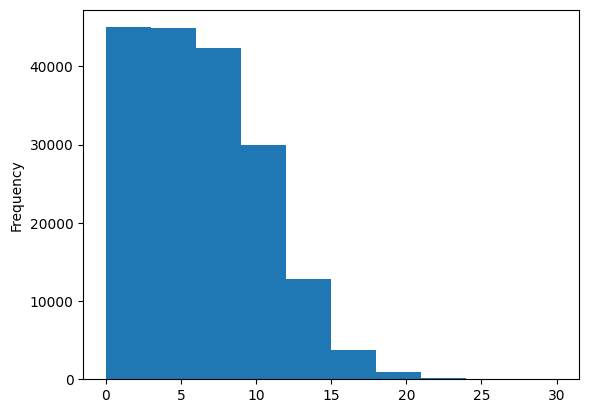

In [ ]:
# Check the distribution of "line_number" column
train_df.line_number.plot.hist()

"Line_number" sütununun dağılımına bakıldığında, satırların çoğunluğunun 15 veya daha az konumu var gibi görünüyor.

Bunu bilerek, tf.one_hot'un derinlik parametresini 15 olarak ayarlayalım.

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

Tf.one_hot'un derinlik parametresini 15'e ayarlamak, "line_number" değeri 15'in üzerinde olan herhangi bir numunenin tüm 0'ların tensörüne ayarlandığı anlamına gelir; burada 15'in altındaki "satır_number" olan herhangi bir örnek, tüm 0'ların tensörüne dönüşür, ancak dizinde "line_number" değerine eşit bir 1 ile.

🔑 Not: "line_number" (derinlik=30) tüm potansiyel değerleri için yer olan tek sıcak bir tensör oluşturabiliriz, ancak bu, değerlerin büyük çoğunluğunun 0 olduğu mevcut olanın (derinlik=15) iki katı büyüklüğünde bir tensörle sonuçlanır. Ayrıca, yalnızca ~2.000/180.000 örnek 15'in üzerinde bir "satır_numarası" değerine sahiptir. Bu nedenle, özellik alanımızı ikiye katlamak için verilerimiz hakkında fazla bilgi edinmezdik. Bu tür bir soruna boyutsallığın laneti denir. Ancak, bu derin modellerle çalıştığımız için, modele mümkün olduğunca fazla bilgi atmaya ve ne olduğunu görmeye değer olabilir. Derinlik parametresinin değerlerini bir uzantı olarak keşfetmeyi bırakacağım.

In [ ]:
# Check one-hot encoded "line_number" feature samples
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

"Toplam_satır" sütunuyla "satır_numarası" sütunumuz için yaptığımızın aynısını yapabiliriz. İlk olarak, tf.one_hot'un derinlik parametresi için uygun bir değer bulalım.

In [ ]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

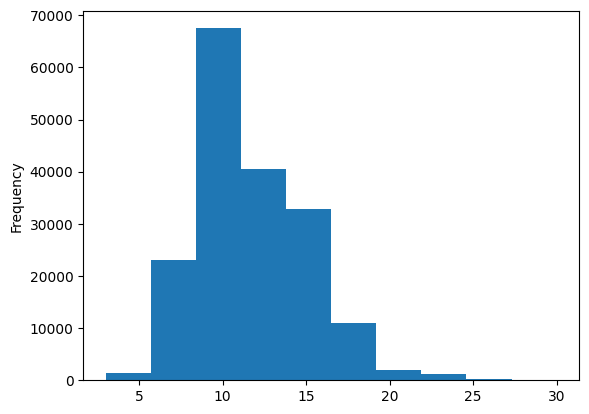

In [ ]:
# Check the distribution of total lines
train_df.total_lines.plot.hist();

"Total_lines" sütunumuzun dağılımına bakıldığında, 20 değeri örneklerin çoğunu kapsıyor gibi görünüyor.

Bunu np.percentile() ile doğrulayabiliriz. https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

In [ ]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples

20.0

Güzel! Bolca yakınsama. "Total_lines" sütunumuzu tıpkı "line_number" sütunumuzu yaptığımız gibi tek-sıcak kodlayalım.

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

20'den büyük değerin burada karşılığı olmayacak sıfırlar olur.

# Tribrid gömme modeli oluşturma

Konumsal gömme tensörleri hazır.

Şimdiye kadar inşa ettiğimiz en büyük modeli inşa etme zamanı. Token gömmeleri, karakter gömmeleri ve yeni hazırlanmış konumsal gömmelerimizi içeren bir tane.

Keşfedilmiş bölgeye gireceğiz ama burada daha önce uygulamadığınız hiçbir şey olmayacak.

Daha spesifik olarak aşağıdaki adımlardan geçeceğiz:

1. Token düzeyinde bir model oluşturun (model_1'e benzer)

2. Karakter düzeyinde bir model oluşturun (kağıdı yansıtmak için hafif bir değişiklikle model_3'e benzer)

3. Bir "line_number" modeli oluşturun (tek-sıcak kodlanmış "line_number" tensörünü alır ve doğrusal olmayan bir katmandan geçirir)

4. Bir "total_lines" modeli oluşturun (tek-sıcak kodlu "total_lines" tensörü alır ve doğrusal olmayan bir katmandan geçirir)

5. 1 ve 2'nin çıktılarını bir token-karakter-hibrit gömme içinde birleştirin (katmanlar kullanarak. Birleştirin) ve Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları'nın Şekil 1 ve bölüm 4.2'sine çıktı serisini iletin https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate

6. 3, 4 ve 5'in çıktılarını bir token-karakter-konumsal tribrid gömmede birleştirin (katmanlar kullanarak. Birleştirin)

7. Tribrid gömme ve çıkış tahmin edilen etiket olasılıklarını kabul etmek için bir çıktı katmanı oluşturun

8. 1, 2, 3, 4 girişlerini ve 7'nin çıkışlarını bir tf.keras.Model'de birleştirin https://www.tensorflow.org/api_docs/python/tf/keras/Model

https://arxiv.org/pdf/1612.05251

LSTM(32) dokümandan gelir, videoda 24 yapmış gerekçesi de karakter gömme token 50 ike 25 alıyor, ama 8'in katlarını tercih etmek için bunu uyguluyor.

train_line_numbers_one_hot[0].shape --> 15

train_total_lines_one_hot.shape --> (180040,20)

4'te model ismi y diye adlandırıldı, x ile karıştırmamamk için. Ayrıca 32'lik özellik vektörüne gömülme olur.

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

8'de bunların sırası, satır numarası, token girişi vs karakteri hatırlamak için önemli.

summary bir sıralı model biri görünüyor.

In [ ]:
# Get a summary of our token, char and positional embedding model
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0][0]']  

* char_inputs --> karakter gömme
* token_inputs --> token dömme
* line_number_input ve total_line_input --> özellik gömme


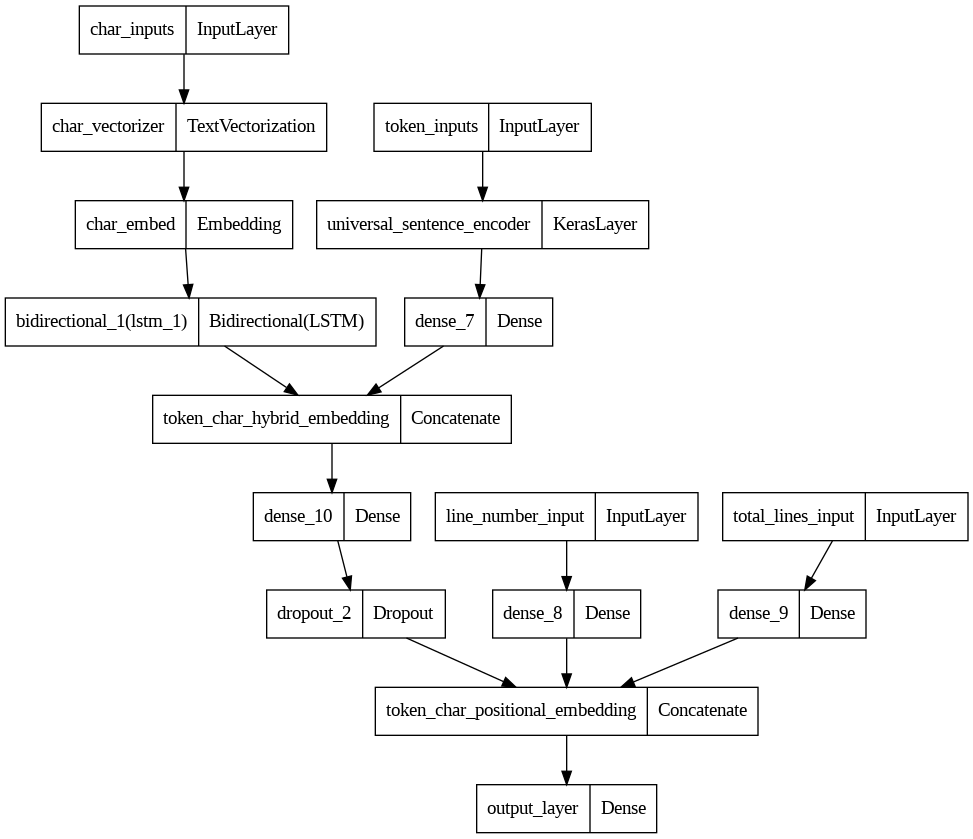

In [ ]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(model_5)

Modeli görselleştirmek, anlaşılmayı çok daha kolay hale getirir.

Esasen yaptığımız şey, dizilerimiz hakkında mümkün olduğunca fazla bilgiyi çeşitli gömmelere (modelimize girdiler) kodlamaya çalışmaktır, böylece modelimiz hangi etiketin bir diziye (modelimizin çıktıları) ait olduğunu bulmak için en iyi şansa sahiptir.

Modelimizin, Tıbbi Kağıt Özetlerinde Ortak Cümle Sınıflandırması için Sinir Ağları Şekil 1'de gösterilen modele çok benzediğini fark edeceksiniz. Ancak, hala birkaç fark devam ediyor: https://arxiv.org/pdf/1612.05251

- GloVe emebdding'ler yerine önceden eğitilmiş TensorFlow Hub belirteç gömmeleri kullanıyoruz.

- Bi-LSTM katmanı yerine token-karakter hibrit gömmelerimizin üzerinde yoğun bir katman kullanıyoruz.

- Makalenin Bölüm 3.1.3'ü, bir etiket dizisi optimizasyon katmanından bahseder (bu, dizi etiketlerinin saygın bir sırayla çıkmasını sağlamaya yardımcı olur) ancak Şekil 1'de gösterilmez. Modelimizde bu katmanın eksikliği için makyaj yapmak için konumsal gömme katmanlarını oluşturduk.

- Makalenin 4.2. Bölümü, belirteç ve karakter gömmelerinin eğitim sırasında güncellendiğinden bahseder, önceden eğitilmiş TensorFlow Hub gömmelerimiz donmuş kalır.

- Kağıt SGD optimize ediciyi kullanıyor, Adam'a bağlı kalacağız.

- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

Yukarıdaki tüm farklılıklar bu projenin potansiyel uzantılarıdır.

In [ ]:
# Check which layers of our model are trainable or not
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x79c0a0f934c0> True
<keras.src.engine.input_layer.InputLayer object at 0x79c145d13ee0> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x79c16b965390> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x79c15411d6f0> False
<keras.src.layers.core.embedding.Embedding object at 0x79c0a0cfb4f0> True
<keras.src.layers.core.dense.Dense object at 0x79c145f3bd30> True
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x79c145d10730> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x79c145ee2410> True
<keras.src.engine.input_layer.InputLayer object at 0x79c145ec2d10> True
<keras.src.engine.input_layer.InputLayer object at 0x79c145d138e0> True
<keras.src.layers.core.dense.Dense object at 0x79c145db2050> True
<keras.src.layers.core.dense.Dense object at 0x79c145ea42b0> True
<keras.src.layers.core.dense.Dense object at 0x79c145ec31c0> True
<keras.src.layers.regularization.dropout.

Şimdi modelimiz inşa edildi, derleyelim.

Bu sefer, kayıp fonksiyonumuza label_smoothing adlı yeni bir parametre tanıtacağız. Etiket yumuşatma, bir örneğe belirli bir etiket uygulamaya çok fazla odaklanmadığından emin olarak modelimizi düzenlemeye (aşırı takmayı önlemeye) yardımcı olur.

Örneğin, bir çıktı tahminine sahip olmak yerine:

- Bir numune için [0.0, 0.0, 1.0, 0.0, 0.0] (model, doğru etiketin indeks 2 olduğundan çok emindir).

Tahminler şöyle bir şey olacak şekilde yumuşatılacak:

- [0.01, 0.01, 0.096, 0.01, 0.01] diğer etiketlerin her birine küçük bir aktivasyon vererek, umarım genellemeyi iyileştirir.

📖 Kaynak: Etiket yumuşatma hakkında daha fazla bilgi için, PyImageSearch'ün harika blog gönderisine bakın, Keras, TensorFlow ve Deep Learning ile etiket yumuşatma. https://pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/

label smooting --> 0-1 arası float türünde sayıdır. Etiket değerleri yumuşatılmıştır. Etiket değerine olan güvenirlilik esnektir. Örneğin bu değer 0.2 ise bir 0 etiketi için 0.1 ve 1 etiketi için 0.9 kullanılır.

Sıfırda, bir sıfır noktasında takılırsa, öğrenmeyi tamamen durdurabilir çünkü model der ki ben sadece 1.0 olanı öğreneceğim, diğerleri unutulabilir.

Ama yumuşatılmışta model 0.01'de sıkışıp kalmaz, daha sağlıklı tahminler...

Etiket yumuşatması olan bu işlevi kullanabilmek için etiketlerimize tek bir sıcak kodlama biçiminde ihtiyacımız vardı.

In [ ]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Tribrid gömme veri kümeleri oluşturun ve tribrid modelini sığdırın

Model derlenmiş!

Yine, deneylerimizi hızlı tutmak için, 3 çağ için 20.000 örneğe sığdıralım.

Bu sefer modelimiz dört özellik girişi gerektiriyor:

1. Eğitim hattı numaraları tek sıcak tensör (train_line_numbers_one_hot)

2. Eğitim toplam hatları bir-sıcak tensör (train_total_lines_one_hot)

3. Token-seviye dizileri tensörü (train_sentences)

4. Char-level dizileri tensörü (train_chars)

Uygun şekilde şekillendirilmiş ve toplu PrefetchedDataset'ler oluşturmak için bunları tf.data.Dataset.from_tensor_slices() yöntemimize demet olarak aktarabiliriz.

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 34s 50ms/step - loss: 1.0907 - accuracy: 0.7295 - val_loss: 0.9811 - val_accuracy: 0.8042
Epoch 2/3
562/562 [==============================] - 22s 39ms/step - loss: 0.9665 - accuracy: 0.8157 - val_loss: 0.9480 - val_accuracy: 0.8305
Epoch 3/3
562/562 [==============================] - 24s 42ms/step - loss: 0.9487 - accuracy: 0.8247 - val_loss: 0.9382 - val_accuracy: 0.8328


Tribrid modeli eğitildi! Daha önce yaptığımız gibi bazı tahminlerde bulunma ve değerlendirme zamanı.

In [ ]:
# Make predictions with token-char-positional hybrid model
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 20s 20ms/step


array([[0.51483923, 0.10175978, 0.01016533, 0.35504222, 0.01819343],
       [0.5518715 , 0.10501808, 0.03760202, 0.2964235 , 0.00908487],
       [0.3176443 , 0.09885965, 0.11041926, 0.40041655, 0.07266029],
       ...,
       [0.04038502, 0.10775369, 0.04257334, 0.03546455, 0.77382344],
       [0.03879575, 0.2708974 , 0.07644685, 0.03186337, 0.5819966 ],
       [0.22774342, 0.5674316 , 0.0939118 , 0.04629599, 0.0646171 ]],
      dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 83.36753607837946,
 'precision': 0.833008690519503,
 'recall': 0.8336753607837946,
 'f1': 0.8325484337481674}

Bazı yeni özellikler bu modele enjekte edilmişti, karakter içe aktarma, token girişleri, konumsal ve embeddings'ler...

yeni bir katman eklenebilir, yumuşatma etiket ayarı değiştirilebilir.

# 200k'yı müsait zamanda dene!!!

# Model sonuçlarını karşılaştır

Çok uzakta, uzun bir yol kat ettik. Temel bir modelden üç farklı türde gömme içeren bir modeli eğitmeye kadar.

Şimdi her modelin performansını birbirleriyle karşılaştırmanın zamanı geldi.

Ayrıca modelimizi PubMed 200k RCT ile karşılaştırabileceğiz: Tıbbi Özetler makalesinde Sıralı Cümle Sınıflandırması için bir Veri Kümesi.

Tüm model sonuçlarımız sözlüklerde olduğundan, onları görselleştirmek için bir panda DataFrame'de birleştirelim. https://arxiv.org/pdf/1710.06071

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.511850,0.782073,0.785118,0.782627
pretrained_token_embed,71.226665,0.713408,0.712267,0.709251
custom_char_embed_conv1d,65.943996,0.652573,0.659440,0.649830
hybrid_char_token_embed,73.891169,0.737681,0.738912,0.736319
tribrid_pos_char_token_embed,83.367536,0.833009,0.833675,0.832548


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

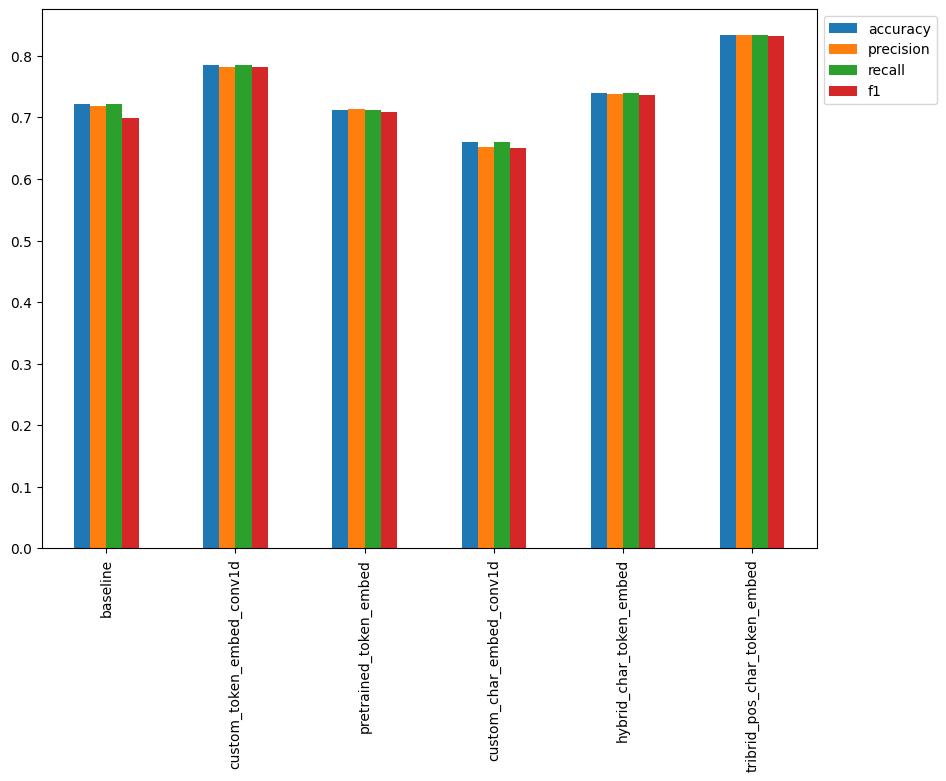

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

PubMed 200k RCT: Tıbbi Özetlerde Sıralı Cümle Sınıflandırması için Bir Veri Kümesi makalesi, test edilen modellerinin test veri kümesindeki F1 puanlarını karşılaştırdığından, modelimizin F1 puanlarını ele alalım.

🔑 Not: Bu karşılaştırmaları eğitim sırasında TensorBoard geri aramasını kullanarak TensorBoard'da da yapabilirdik.

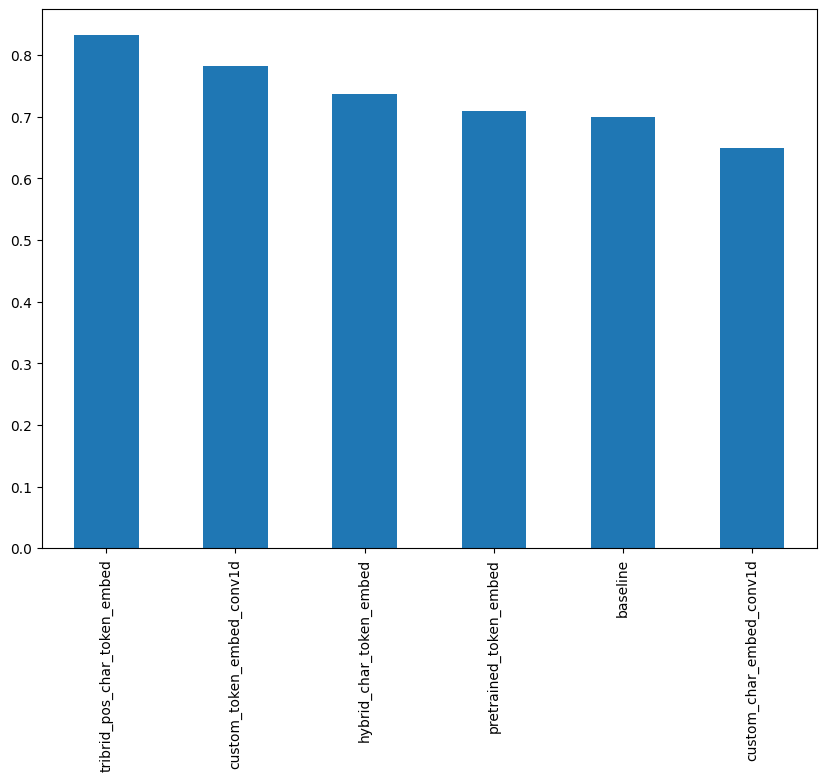

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

Güzel! F1-scores'a dayanarak, tribrid gömme modelimiz adil bir farkla en iyi performansı sergiliyor gibi görünüyor.

Bununla birlikte, PubMed 200k RCT'nin Tablo 3'ünde bildirilen sonuçlarla karşılaştırıldığında: Tıbbi Özetler makalesinde Sıralı Cümle Sınıflandırması için Bir Veri Kümesi, modelimizin F1-skoru hala düşük performans gösteriyor (yazar modeli, ~82.6'lık F1 skorumuza karşı 20k RCT veri kümesinde 90.0'lık bir F1 puanı elde ediyor). https://arxiv.org/pdf/1710.06071

Bu fark hakkında dikkat edilmesi gereken bazı şeyler var:

- Modellerimiz (taban çizgisi hariç), 20k RCT veri kümesindeki tam ~180.000 yerine ~18.000 (partilerin %10'u) dizi ve etiket örneği üzerinde eğitilmiştir.

  - Bununla birlikte, makine öğrenimi deneylerinde genellikle durum böyledir, eğitimin daha az sayıda örnek üzerinde çalıştığından emin olun, ardından gerektiğinde yükseltin (bu projenin bir uzantısı, tam veri kümesinde bir model eğitecektir).

- Modelimizin tahmin performans seviyeleri, test veri kümesinde değil, doğrulama veri kümesinde değerlendirilmiştir (en iyi modelimizi kısa süre içinde test veri kümesinde değerlendireceğiz).

# En iyi performans gösteren modeli kaydedin ve yükleyin

Çok az deney yaptığımız için, en iyi performans gösteren modelimizi kaydetmek iyi bir fikirdir, böylece onu yeniden eğitmek zorunda kalmadan yeniden kullanabiliriz.

Üzerinde save() yöntemini çağırarak en iyi performans gösteren modelimizi kaydedebiliriz. https://www.tensorflow.org/guide/keras/serialization_and_saving#the_short_answer_to_saving_loading

Modeli kaydettiğinde model kaydedilir ve veri kümesini değerlendirdiğinde onu tekrar yüklemiş olursun.

Bu modeli kaydedip colab dışında başka bir yerde kullanabilmeliyiz.

In [ ]:
# Save best performing model to SavedModel format (default)
model_5.save("skimlit_tribrid_model") # model will be saved to path specified by string

İsteğe bağlı: Google Colab kullanıyorsanız, daha kalıcı depolama için kayıtlı modelinizi Google Drive'a kopyalamak (veya indirmek) isteyebilirsiniz (bağlantınızı kestikten sonra Google Colab dosyaları kaybolur). https://colab.research.google.com/notebooks/io.ipynb#scrollTo=hauvGV4hV-Mh

In [ ]:
# Example of copying saved model from Google Colab to Drive (requires Google Drive to be mounted)
# !cp skimlit_best_model -r /content/drive/MyDrive/tensorflow_course/skim_lit

Tüm iyi yemek pişirme şovları gibi, önceden eğitilmiş bir modelimiz var (tam olarak Google Drive ve Google Storage'da kaydedilen ve saklanan model_5 için oluşturduğumuz aynı tür model). https://drive.google.com/file/d/1quaeTYEzwolI0dXv98S9GEXOTVu9Akfk/view

Bu nedenle, değerlendirme için hepimizin aynı modeli kullandığımızdan emin olmak için onu indirip yükleyeceğiz.

Ve modelimize yüklerken, birkaç özel nesne (TensorFlow Hub katmanımız ve TextVectorization katmanımız) kullandığından, bunları tf.keras.models.load_model()'ın custom_objects parametresinde belirterek yüklememiz gerekecek.

- https://www.tensorflow.org/guide/keras/serialization_and_saving#custom_objects
- https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model

In [ ]:
# Download pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlit_gs_model
!unzip skimlit_tribrid_model.zip -d skimlit_gs_model

--2024-05-26 09:52:48--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.207, 142.250.125.207, 142.250.148.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962182847 (918M) [application/zip]
Saving to: ‘skimlit_tribrid_model.zip’

skimlit_tribrid_mod 100%[===================>] 917.61M  36.0MB/s    in 16s     

2024-05-26 09:53:04 (56.1 MB/s) - ‘skimlit_tribrid_model.zip’ saved [962182847/962182847]

Archive:  skimlit_tribrid_model.zip
   creating: skimlit_gs_model/skimlit_tribrid_model/
  inflating: skimlit_gs_model/skimlit_tribrid_model/keras_metadata.pb  
   creating: skimlit_gs_model/skimlit_tribrid_model/assets/
 extracting: skimlit_gs_model/skimlit_tribrid_model/fingerprint.pb  
   creating: skimlit_gs_model/skimlit_tribrid_model/variables/
  inflating: skimlit_gs_model/

In [ ]:
# Import TensorFlow model dependencies (if needed) - https://github.com/tensorflow/tensorflow/issues/38250
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "skimlit_gs_model/skimlit_tribrid_model/"

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model(model_path)#,
                                          # Note: with TensorFlow 2.5+ if your SavedModel has a keras_metadata.pb file
                                          # (created when using model.save()), you shouldn't need the custom_objects
                                          # parameter. I'm leaving the code below here in case you do.
                                          # custom_objects={"TextVectorization": TextVectorization, # required for char vectorization
                                          #                 "KerasLayer": hub.KerasLayer}) # required for token embedding

Dosyada oluşan modele sağ tık yaparsan istediğin yükleme seçenekleri çıkmaz.

Yüklü modeli test etmenin yollarından birisi de tahmin yapıp karşılaştırmaktır. Bu tahminler result kodundaki sonuçlar ile çok yakın olmalı.

# Tahminlerde bulunun ve bunları gerçek etiketlerine karşı değerlendirin

Modelimizin doğru bir şekilde kaydedildiğinden ve yüklendiğinden emin olmak için, onunla tahminlerde bulunalım, değerlendirelim ve ardından daha önce hesapladığımız tahmin sonuçlarıyla karşılaştıralım.

Colab kapatılınca model gider. Drive'a indirmeli veya yerel makinede çalışmalı.

Bir model ile sadece eğitim aldığı veri formatıyla aynı formatta tahminler yapılabilir.

Kaynak şablonundaki veri tabloları google depolama alanında kayıtlıdır. Buradan veri almak için sağ tık link kopyala yap. (learntensorflow.io) Bu link !wget...unzip komutları ile yüklenebilir. -d dizin demek.

In [ ]:
# Make predictions with the loaded model on the validation set
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 19s 19ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
# Evaluate loaded model's predictions
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 83.03323182841254,
 'precision': 0.8290556618130785,
 'recall': 0.8303323182841255,
 'f1': 0.8294263092000485}

Şimdi yüklü modelimizin tahminlerini, modelimizi kaydetmeden önce elde ettiğimiz tahmin sonuçlarıyla karşılaştıralım.

In [ ]:
# Compare loaded model results with original trained model results (should be quite close)
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()), rtol=1e-02)

array([ True,  True,  True,  True])

Kaydedilmiş bir Model'e yüklemenin tüm katmanları çözdüğünü (hepsini eğitilebilir hale getirdiğini) belirtmekte fayda var. Bu nedenle, herhangi bir katmanı dondurmak istiyorsanız, eğitilebilir özelliklerini False olarak ayarlamanız gerekir.

In [ ]:
# Check loaded model summary (note the number of trainable parameters)
loaded_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0][0]']  

# Test veri setinde modeli değerlendirin

Modelimizin performansını PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts makalesinin Tablo 3'ünde bildirilen sonuçlarla daha karşılaştırılabilir hale getirmek için, test veri kümesi hakkında tahminlerde bulunalım ve bunları değerlendirelim. https://arxiv.org/pdf/1710.06071

In [ ]:
# Create test dataset batch and prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Make predictions on the test dataset
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

604/942 [==================>...........] - ETA: 6s

In [ ]:
# Evaluate loaded model test predictions
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 82.57176041148166,
 'precision': 0.8242659626849546,
 'recall': 0.8257176041148167,
 'f1': 0.8247141207593822}

Görünüşe göre (şimdiye kadarki en iyi modelimiz) kağıttaki sonuçların performansını eşleştirmek için hala bazı yollara sahip (onların modeli test veri kümesinde 90.0 F1 puanı alır, bizimki de ~82.1 F1 puanı alır).

Bununla birlikte, daha önce tartıştığımız gibi, modelimiz RCT 20k veri kümesindeki toplam ~180.000 dizinin yalnızca 20.000'inde eğitilmiştir. Ayrıca önceden eğitilmiş gömmelerimizi (kağıt ince ayarlı GloVe gömmeleri) ince ayar yapmadık. Sonuçlarımızı iyileştirmek için deneyebileceğimiz birkaç uzantı var.

# En çok yanlış bul

Modelinizin nerede yanlış gittiğini (veya potansiyel olarak verilerinizin nerede yanlış olduğunu) araştırmanın en iyi yollarından biri, "en yanlış" tahminleri görselleştirmektir.

En yanlış tahminler, modelin yüksek olasılıklı bir tahminde bulunduğu ancak yanlış anladığı örneklerdir (modelin tahmini, temel doğruluk etiketiyle aynı fikirde değildir).

En yanlış tahminlere bakmak, daha fazla modeli nasıl geliştireceğimiz veya verilerimizdeki etiketleri nasıl düzelteceğimiz konusunda bize değerli bilgiler verebilir.

Test veri kümesinden en yanlış tahminleri görselleştirmemize yardımcı olacak bazı kodlar yazalım.

Önce tüm tamsayı tabanlı test tahminlerimizi dize tabanlı sınıf adlarına dönüştüreceğiz.

In [ ]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 18.9 s, sys: 834 ms, total: 19.8 s
Wall time: 40.9 s


['OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'METHODS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS

Şimdi test DataFame'imizi birkaç değerle zenginleştireceğiz:

1. Belirli bir örnek için modelimizin tahminini içeren bir "tahmin" (dize) sütunu.

2. Belirli bir örnek için modelin maksimum tahmin olasılığını içeren bir "pred_prob" (float) sütunu.

3. Modelin tahmininin numunenin hedef etiketiyle eşleşip eşleşmediğini gösteren bir "doğru" (bool) sütunu.

In [ ]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.523885,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,OBJECTIVE,0.351917,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.802459,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.652782,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.665070,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.881815,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.529839,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.568003,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,CONCLUSIONS,0.461431,True
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.537819,True


İyi görünüyor! Verilerimizin böyle olması, farklı şekillerde manipüle etmeyi ve görüntülemeyi çok kolaylaştırır.

En yüksek "pred_prob"a sahip örnekleri ve tahminin nerede yanlış olduğunu ("doğru" == Yanlış) bulmak için DataFrame'imizi sıralamaya ne dersiniz?

In [ ]:
# Find top 100 most wrong samples (note: 100 is an abitrary number, you could go through all of them if you wanted)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.946719,False
8545,METHODS,pretest-posttest .,1,11,BACKGROUND,0.934974,False
16347,BACKGROUND,to evaluate the effects of the lactic acid bac...,0,12,OBJECTIVE,0.930986,False
2388,RESULTS,the primary endpoint is the cumulative three-y...,4,13,METHODS,0.928262,False
10452,BACKGROUND,to validate the association between accommodat...,0,10,OBJECTIVE,0.918880,False
...,...,...,...,...,...,...,...
12134,RESULTS,we conducted a population-based case-control s...,2,16,METHODS,0.840899,False
2605,RESULTS,"circulating epc ( cells positive for cd@ , cd@...",4,10,METHODS,0.840442,False
19223,METHODS,"of the @ dogs receiving placebo , @ ( @ % ) vo...",7,10,RESULTS,0.840310,False
20003,CONCLUSIONS,most subjects with bronchospasm responded to r...,9,11,RESULTS,0.839986,False


Harika (ya da o kadar iyi değil)! Şimdi modelimizin en yanlış tahminlerinin bir alt kümesine sahipiz, bunları görselleştirmek için biraz kod yazalım.

In [ ]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9467191696166992, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9349740743637085, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9309859275817871, Line number: 0, Total lines: 12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9282616972923279, Line number: 4, Total lines: 13

Text:
the primary endpoint is the cumulative three-year hiv incidence .

-----

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.918879508972168, Line number: 0, Total lines: 10

Text:
to validate the association between accommodation and visual asthenopia by measuring objective accommodative amplitude with the optical quality analysis system ( oqas , visiometrics , terrassa , spain ) 

En yanlış tahminler hakkında ne fark ediyorsunuz? Model aptalca hatalar yapıyor mu? Veya bazı etiketler yanlış/belirsiz mi (örneğin, soyuttaki bir satır potansiyel olarak HEDEF veya ARKA PLAN olarak etiketlenebilir ve mantıklı olabilir).

Buradaki bir sonraki adım, tutarsız etiketlere sahip birkaç örnek varsa, eğitim veri kümenizi gözden geçirebilir, etiketleri güncelleyebilir ve ardından bir modeli yeniden eğitebilirsiniz. Veri kümenizin etiketlerini iyileştirmeye/araştırmaya yardımcı olacak bir model kullanma süreci genellikle aktif öğrenme olarak adlandırılır.

# Örnek tahminler yapın

Tamam, test veri kümesi hakkında bazı tahminlerde bulunduk, şimdi modelimizi gerçekten test etme zamanı.

Bunu yapmak için, vahşi doğadan bazı veriler alacağız ve modelimizin nasıl performans gösterdiğini göreceğiz.

Başka bir deyişle, PubMed'den bir RCT özeti bulacak, metni modelimizle çalışması için önceden işleyecek, ardından hangi etiketi tahmin ettiğini görmek için vahşi soyuttaki her diziyi modelimizden geçirecektik.

Uygun bir örnek için, bölünmüş özetler olmadan RCT'ler (randomize kontrollü çalışmalar) için PubMed'i aramamız gerekecek (PubMed'i keşfederken, özetlerin çoğunun zaten ayrı bölümlere önceden biçimlendirilmiş olduğunu fark edeceksiniz, bu okunabilirliğe önemli ölçüde yardımcı olur).

Çeşitli PubMed çalışmalarından geçerken, yüksek işlevli otizm spektrum bozuklukları için manuelleştirilmiş bir sosyal tedavinin RCT'den aşağıdaki yapılandırılmamış özetini bulmayı başardım: https://pubmed.ncbi.nlm.nih.gov/20232240/

Orjinali:

This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.

Çevirisi:

Bu RCT, HFASD'li çocuklar için manuelleştirilmiş bir sosyal müdahalenin etkinliğini incelemiştir. Katılımcılar rastgele tedavi veya bekleme listesi koşullarına atandı. Tedavi, sosyal becerileri, yüz-duygu tanımayı, ilgi alanını genişletmeyi ve edebi olmayan dilin yorumlanmasını hedefleyen öğretim ve terapötik faaliyetleri içeriyordu. Sorunlu davranışları azaltmak ve beceri edinimini teşvik etmek için bir response-cost programı uygulandı. Yedi birincil sonuç ölçütünün beşi (ebeveyn derecelendirmeleri ve doğrudan çocuk ölçümleri) için önemli tedavi etkileri bulundu. Personel derecelendirmelerine (yalnızca tedavi grubu) dayalı ikincil önlemler, ebeveynler tarafından bildirilen kazanımları doğruladı. Yüksek düzeyde tedavi sadakati ile birlikte yüksek düzeyde ebeveyn, çocuk ve personel memnuniyeti bildirilmiştir. Standartlaştırılmış etki boyutu tahminleri öncelikle orta ve büyük aralıklardaydı ve tedavi grubunu tercih etti.

Büyük metin yığınına bakmak oldukça korkutucu görünebilir. Şimdi, çalışmanızla ilgili bir çalışma bulmak için literatürü gözden geçirmeye çalışan bir tıp araştırmacısı olduğunuzu hayal edin.

Oldukça zor görünüyor değil mi?

SkimLit'e girin 🤓🔥!

Şimdiye kadarki en iyi modelimizin (model_5) yukarıdaki soyuttan ne yaptığını görelim.

Ama bekle...

Tahmin edebileceğiniz gibi, yukarıdaki özet, modelimizin eğitildiği verilerle aynı yapıda biçimlendirilmemiştir. Bu nedenle, üzerinde bir tahminde bulunmadan önce, tıpkı diğer dizilerimiz olduğu gibi onu önceden işlememiz gerekir.

Daha spesifik olarak, her özet için şunları yapmamız gerekecek:

- Cümlelere (satırlara) bölün.

- Karakterlere bölün.

- Her satırın numarasını bulun.

- Toplam satır sayısını bulun.

1 numaradan başlayarak, özetlerimizi gerçek cümlelere bölmenin birkaç yolu vardır. Basit bir tanesi, Python'un in-built split() string yöntemini kullanmak ve bir fullstop'un göründüğü her yerde özeti bölmek olacaktır. Ancak, bunun nerede yanlış gidebileceğini hayal edebiliyor musunuz?

Başka bir daha gelişmiş seçenek, spaCy'nin (çok güçlü bir NLP kitaplığı) sentencizer sınıfından yararlanmak olacaktır. SpaCy'nin İngilizce dil modeline dayanan kullanımı kolay bir cümle ayırıcıdır.

- https://spacy.io/
- https://spacy.io/usage/linguistic-features#sbd
- https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

Modelimizi denemek için PubMed RCT makalelerinden bazı özetler hazırladım, GitHub'dan indirebiliriz.

In [ ]:
import json
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2024-05-26 11:19:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json.2’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2024-05-26 11:19:07 (80.4 MB/s) - ‘skimlit_example_abstracts.json.2’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [ ]:
# See what our example abstracts look like
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


Şimdi bazı örnek özetler indirdik, bakalım bunlardan biri eğitimli modelimizle nasıl gidiyor.

İlk olarak, büyük bir metin parçasından cümlelere dönüştürmek için spaCy kullanarak ayrıştırmamız gerekecek.

In [ ]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Old version of spaCy
# sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
# nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

Güzel! SpaCy, özetteki cümleleri doğru bir şekilde bölmüş gibi görünüyor. Bununla birlikte, ayrı cümlelere mükemmel bir şekilde bölünmeyen daha karmaşık özetler olabileceği unutulmamalıdır (Baclofen'deki örnek gibi, hepatit C virüsü (HCV) enfeksiyonu olan alkol bağımlı sirotik hastalarda alkol yoksunluğunu teşvik eder), bu durumda, daha özel bölme tekniklerinin araştırılması gerekir. https://pubmed.ncbi.nlm.nih.gov/22244707/

Şimdi özetimiz cümlelere bölündü, toplam satırların yanı sıra satır sayılarını da saymak için biraz kod yazmaya ne dersiniz?

Bunu yapmak için, preprocess_text_with_line_numbers() işlevimizin bazı işlevlerinden yararlanabiliriz.

In [ ]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

Şimdi "line_number" ve "total_lines" değerlerimiz var, onları tf.one_hot ile tek sıcak kodlayabiliriz, tıpkı eğitim veri kümemizde yaptığımız gibi (derinlik parametresi için aynı değerleri kullanarak).

In [ ]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

Soyut satırlarımızı karakterlere bölmek için split_chars() işlevimizi de kullanabiliriz.

In [ ]:
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

Pekala, şimdi vahşi RCT özetimizi modelimizin eğitildiği aynı özelliklere önceden işledik, bu özellikleri modelimize aktarabilir ve sıra etiketi tahminleri yapabiliriz!

In [ ]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 0s 113ms/step
CPU times: user 133 ms, sys: 2.28 ms, total: 135 ms
Wall time: 208 ms


array([[0.26448247, 0.11054242, 0.01762423, 0.5750656 , 0.03228523],
       [0.06927066, 0.03808297, 0.7078093 , 0.09543166, 0.08940545],
       [0.13772687, 0.04937517, 0.5467969 , 0.16341288, 0.10268807],
       [0.09659056, 0.1711164 , 0.5257439 , 0.07601643, 0.13053273],
       [0.04459697, 0.08888116, 0.45675445, 0.04623032, 0.36353707],
       [0.03265214, 0.1462643 , 0.517485  , 0.04088319, 0.2627154 ],
       [0.03290154, 0.17796215, 0.07166825, 0.02870874, 0.6887593 ],
       [0.0184372 , 0.1349517 , 0.3208419 , 0.03389723, 0.49187198]],
      dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 2, 2, 4, 4])>

Şimdi örnek özetimizde her satır için tahmin edilen dizi etiketimiz var, her cümleyi tahmin edilen etiketiyle görselleştirmek için biraz kod yazalım.

In [ ]:
# Turn prediction class integers into string class names
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [ ]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
METHODS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


Güzel! Okumak çok daha kolay değil mi? Demek istediğim, modelimizin tahminleri geliştirilebilir gibi görünüyor, ama bu ne kadar havalı?

Sitedeki yapılandırılmamış herhangi bir RCT özetini biçimlendirmek için modelimizi PubMed web sitesinin arka ucuna uyguladığımızı hayal edin.

Ya da herhangi bir yapılandırılmamış RCT özetine (modelimiz tarafından desteklenen) yapı ekleyecek "SkimLit" adlı bir tarayıcı uzantısı bile olabilir.

Ve eğer tıbbi araştırmacı arkadaşınızı gösterdiyse ve tahminlerin standartlara uygun olmadığını düşündülerse, "bu etiket doğru mu?... değilse, ne olmalı?" diyen bir düğme olabilir. Bu şekilde, modelimizin gelecekteki tahminleriyle birlikte veri kümesi zaman içinde geliştirilebilir.

Tabii ki, modeli, kullanılabilirliği, ön işleme işlevselliğini (örneğin, örnek soyut ön işleme boru hattımızı işlevsel hale getirmek) geliştirmek için kullanabileceğimiz daha birçok yol var, ancak bunları alıştırmalar/uzantılar için bırakacağım.

🤔 Soru: Vahşi doğadan test örneğimizin sonuçlarının gerçekten vahşi olduğundan nasıl emin olabiliriz? Test ettiğimiz numune hakkında kontrol etmemiz gereken bir şey var mı?

# 📖 Müfredat dışı

Metin/spaCy ile çalışma hakkında daha fazla bilgi için spaCy'nin gelişmiş NLP kursuna bakın. Üretim düzeyinde NLP sorunları üzerinde çalışacaksanız, muhtemelen spaCy kullanacaksınız. https://course.spacy.io/en/

Az önce yaşadığımız gibi bir metin sınıflandırma sorununa nasıl yaklaşılacağına dair başka bir bakış için, metin sınıflandırması için Google'ın Makine Öğrenimi Kursu'ndan geçmenizi öneririm. https://developers.google.com/machine-learning/guides/text-classification?hl=tr

Veri kümemiz dengesiz sınıflara sahip olduğundan (birçok gerçek dünya veri kümesinde olduğu gibi), dengesiz sınıflarla bir modeli eğitmek için farklı yöntemler için TensorFlow kılavuzuna bakmaya değer olabilir. https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=tr

# 🛠Alıştırmalar

1. Eğitim veri kümesindeki tüm veriler üzerinde model_5'i iyileştirmeyi durdurana kadar birçok dönem boyunca eğitin. Bu biraz zaman alabileceğinden, kullanmak isteyebilirsiniz:

  - Sadece modelin en iyi ağırlıklarını kaydetmek için tf.keras.callbacks.ModelCheckpoint. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

  - tf.keras.callbacks.Doğrulama kaybı ~3 dönem için gelişmeyi durdurduktan sonra modeli eğitimden durdurmak için EarlyStopping. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

2. Önceden eğitilmiş GloVe gömmelerini kullanma konusunda Keras kılavuzuna göz atın. Bunu modellerimizden biriyle çalıştırabilir misin? https://keras.io/examples/nlp/pretrained_word_embeddings/

  - İpucu: Bunu özel bir belirteç Gömme katmanıyla birleştirmek isteyeceksiniz. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

  - GloVe gömülerini ince ayar yapıp yapmamanız veya donmuş bırakmanız size kalmış.

3. TensorFlow Hub BERT PubMed uzmanı (PubMed metinleri üzerinde önceden eğitilmiş bir dil modeli) için TensorFlow Hub Evrensel Cümle Kodlayıcısı önceden eğitilmiş gömmeyi değiştirmeyi deneyin. Bu etki ortaya çıkar mı? https://www.kaggle.com/models/google/experts-bert/tensorFlow2/pubmed/2?tfhub-redirect=true

  - Not: BERT PubMed uzmanı önceden eğitilmiş gömmeyi kullanmak, diziler için ekstra bir ön işlem adımı gerektirir (TensorFlow Hub kılavuzunda ayrıntılı olarak açıklandığı gibi). https://www.kaggle.com/models/google/experts-bert/tensorFlow2/pubmed/2?tfhub-redirect=true

  - BERT modeli bu makalede bahsedilen sonuçları yendi mi? Https://arxiv.org/pdf/1710.06071.pdf

4. Her dizi için line_number ve total_lines özelliklerimizi birleştirirseniz ne olur? Örneğin, bunun yerine bir X_of_Y özelliği oluşturuldu mu? Bu, model performansını etkiler mi?

  - Başka bir örnek: line_number=1 ve total_lines=11, line_of_X=1_of_11'e dönüşür.

5. Örnek bir soyut dize almak için bir işlev (veya bir dizi işlev) yazın, önceden işleyin (modelimizin eğitildiği şekilde), özetteki her dizi için bir tahminde bulunun ve özeti biçimde döndürün:

  - PREDICTED_LABEL: SEQUENCE
  - PREDICTED_LABEL: SEQUENCE
  - PREDICTED_LABEL: SEQUENCE
  - PREDICTED_LABEL: SEQUENCE

...

PubMed'den kendi düzenlenmemiş RCT özetinizi bulabilir veya bunu şu adresten deneyebilirsiniz: Baclofen, hepatit C virüsü (HCV) enfeksiyonu olan alkol bağımlı siroz hastalarında alkolden uzak durmayı teşvik eder. https://pubmed.ncbi.nlm.nih.gov/22244707/

# Kronik Grastrit İncelemesi

In [ ]:
import json
import requests

url = "https://raw.githubusercontent.com/MuhammedBarut/dosyalar_nlp/main/kronik_gastrit.json"

response = requests.get(url)
kronik_gastrit = response.json()

print(kronik_gastrit)

[{'abstract': "H. pylori is a Gram-negative, spiral shaped microaerophile pathogen which is colonized in more than half of the world population's stomach. It is a major cause of gastritis associated disease like gastritis, gastric ulcer, duodenal ulcer, gastric adenocarcinoma, mucosa associated lymphoid tissue lymphoma (MALT lymphoma). Genetic diversity within the virulence genes of bacteria such as Cytotoxin associated gene Pathogenicity Island (cagPAI) and vacuolating cytotoxinA (vacA) may have a modifying effect on the pathogenic potential of the infecting strain. This study aimed to investigate which genes can be suggested as potentially related virulence factors for H. pylori associated active chronic gastritis and stomach Adenocarcinoma in Iran and Turkey. We focused on some cag (PAI) components and vacA gene subtypes based on correlations shown in some previous studies and Formalin Fixed Paraffin Embedded (FFPE) tissues obtained from Iranian and Turkish patients. The prevalence 

In [ ]:
# See what our example abstracts look like
ozet = pd.DataFrame(kronik_gastrit)
ozet

,abstract,source,details
0,"H. pylori is a Gram-negative, spiral shaped mi...",https://tez.yok.gov.tr/UlusalTezMerkezi/tezSor...,Investigation of the effect of diabetes mellit...


In [ ]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(kronik_gastrit[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

["H. pylori is a Gram-negative, spiral shaped microaerophile pathogen which is colonized in more than half of the world population's stomach.",
 'It is a major cause of gastritis associated disease like gastritis, gastric ulcer, duodenal ulcer, gastric adenocarcinoma, mucosa associated lymphoid tissue lymphoma (MALT lymphoma).',
 'Genetic diversity within the virulence genes of bacteria such as Cytotoxin associated gene Pathogenicity Island (cagPAI) and vacuolating cytotoxinA (vacA) may have a modifying effect on the pathogenic potential of the infecting strain.',
 'This study aimed to investigate which genes can be suggested as potentially related virulence factors for H. pylori associated active chronic gastritis and stomach Adenocarcinoma in Iran and Turkey.',
 'We focused on some cag (PAI) components and vacA gene subtypes based on correlations shown in some previous studies and Formalin Fixed Paraffin Embedded (FFPE) tissues obtained from Iranian and Turkish patients.',
 'The prev

In [ ]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'text': "H. pylori is a Gram-negative, spiral shaped microaerophile pathogen which is colonized in more than half of the world population's stomach.",
  'line_number': 0,
  'total_lines': 7},
 {'text': 'It is a major cause of gastritis associated disease like gastritis, gastric ulcer, duodenal ulcer, gastric adenocarcinoma, mucosa associated lymphoid tissue lymphoma (MALT lymphoma).',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Genetic diversity within the virulence genes of bacteria such as Cytotoxin associated gene Pathogenicity Island (cagPAI) and vacuolating cytotoxinA (vacA) may have a modifying effect on the pathogenic potential of the infecting strain.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'This study aimed to investigate which genes can be suggested as potentially related virulence factors for H. pylori associated active chronic gastritis and stomach Adenocarcinoma in Iran and Turkey.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'We focused on s

In [ ]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

["H .   p y l o r i   i s   a   G r a m - n e g a t i v e ,   s p i r a l   s h a p e d   m i c r o a e r o p h i l e   p a t h o g e n   w h i c h   i s   c o l o n i z e d   i n   m o r e   t h a n   h a l f   o f   t h e   w o r l d   p o p u l a t i o n ' s   s t o m a c h .",
 'I t   i s   a   m a j o r   c a u s e   o f   g a s t r i t i s   a s s o c i a t e d   d i s e a s e   l i k e   g a s t r i t i s ,   g a s t r i c   u l c e r ,   d u o d e n a l   u l c e r ,   g a s t r i c   a d e n o c a r c i n o m a ,   m u c o s a   a s s o c i a t e d   l y m p h o i d   t i s s u e   l y m p h o m a   ( M A L T   l y m p h o m a ) .',
 'G e n e t i c   d i v e r s i t y   w i t h i n   t h e   v i r u l e n c e   g e n e s   o f   b a c t e r i a   s u c h   a s   C y t o t o x i n   a s s o c i a t e d   g e n e   P a t h o g e n i c i t y   I s l a n d   ( c a g P A I )   a n d   v a c u o l a t i n g   c y t o t o x i n A   ( v a c A )   m a y   h a v e   a   m o d i f y i n 

In [ ]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 0s 36ms/step
CPU times: user 104 ms, sys: 884 µs, total: 105 ms
Wall time: 93.9 ms


array([[0.5048185 , 0.1020873 , 0.02903611, 0.32913283, 0.03492522],
       [0.36879376, 0.21634556, 0.04051226, 0.34645888, 0.0278895 ],
       [0.4134071 , 0.26191053, 0.05812656, 0.24422096, 0.02233484],
       [0.20578164, 0.43534684, 0.07648571, 0.25100738, 0.03137844],
       [0.09973665, 0.24112633, 0.36120215, 0.07625338, 0.2216814 ],
       [0.03243421, 0.13685814, 0.34434414, 0.04047624, 0.44588727],
       [0.0633763 , 0.52659875, 0.06158883, 0.04794252, 0.30049357],
       [0.06297437, 0.79957044, 0.01628507, 0.04813183, 0.07303828]],
      dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([0, 0, 0, 1, 2, 4, 1, 1])>

In [ ]:
# Turn prediction class integers into string class names
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'CONCLUSIONS',
 'METHODS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS']

In [ ]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

BACKGROUND: H. pylori is a Gram-negative, spiral shaped microaerophile pathogen which is colonized in more than half of the world population's stomach.
BACKGROUND: It is a major cause of gastritis associated disease like gastritis, gastric ulcer, duodenal ulcer, gastric adenocarcinoma, mucosa associated lymphoid tissue lymphoma (MALT lymphoma).
BACKGROUND: Genetic diversity within the virulence genes of bacteria such as Cytotoxin associated gene Pathogenicity Island (cagPAI) and vacuolating cytotoxinA (vacA) may have a modifying effect on the pathogenic potential of the infecting strain.
CONCLUSIONS: This study aimed to investigate which genes can be suggested as potentially related virulence factors for H. pylori associated active chronic gastritis and stomach Adenocarcinoma in Iran and Turkey.
METHODS: We focused on some cag (PAI) components and vacA gene subtypes based on correlations shown in some previous studies and Formalin Fixed Paraffin Embedded (FFPE) tissues obtained from Ir